# **Predicción de la ganancia obtenida por un hipermercado**

# **Introducción**

Este proyecto emplea los datos contables de un hipermercado. Los datos incluyen variables como descuentos, ventas y cantidad, entre otras. La variable dependiente es la ganancia, la cual se quiere predecir para determinar cuáles son las componentes de las variables independientes adecuadas para obtener las mejores ganancias.

# **Objetivos**

* Llevar a cabo el modelo de regresión lineal y bosques aleatorios para así predecir la variable objetivo “ganancia”.
* Realizar el preprocesamiento de datos para luego aplicar los modelos mencionados anteriormente


In [35]:

import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm



## Visualización de los datos con pandas:

In [36]:
df = pd.read_csv("superstore.csv", encoding="ISO-8859-1")

print(df.head(20))


    Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0        1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1        2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2        3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3        4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4        5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
5        6  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
6        7  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
7        8  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
8        9  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
9       10  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
10      11  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
11      12  CA-2011-115812  09-06-2011  14-06-2011  Standard Class   
12      13  CA-2014-114412  16-04-2014  21-04-2014  Standard Class   
13      14  CA-2013-

## Tipos de datos en cada variable:

In [37]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

## Cantidad de ocurrencias de los items que se encuentran en la variable “Segment”:

In [38]:
# Obtenemos el número de ocurrencias de cada valor en la variable
value_counts = df["Segment"].value_counts()

# Imprimimos el resultado
print(value_counts)

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


## Generar  valores numericos a cada item de la variable “Segmento”:

In [39]:
# asignacion de valores  numericos a "segmento"

df = (
    df
    .assign(
        Segment_=lambda df: df.Segment.replace(['Consumer', 'Corporate', 'Central', 'Home Office'], [0, 1, 2, 3])              
        

    )
)

## Cantidad de ocurrencias de los items que se encuentran en la variable “Region”:

In [40]:
# Obtenemos el número de ocurrencias de cada valor en la variable
value_counts = df["Region"].value_counts()

# Imprimimos el resultado
print(value_counts)

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


## Generar valores numericos a cada item de la variable “Region”:

In [41]:
# asignacion de valores  numerios a "region"

df = (
    df
    .assign(
        Region_=lambda df: df.Region.replace(['West', 'East', 'Central', 'South'], [0, 1, 2, 3])              
        

    )
)

## Cantidad de ocurrencias de los items que se encuentran en la variable “State”:

In [42]:
# Obtenemos el número de ocurrencias de cada valor en la variable
value_counts = df["State"].value_counts()

# Imprimimos el resultado
print(value_counts)

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

## Cantidad de ocurrencias de los items que se encuentran en la variable “Sub-Category”:

In [43]:
# Obtenemos el número de ocurrencias de cada valor en la variable
value_counts = df["Sub-Category"].value_counts()

# Imprimimos el resultado
print(value_counts)

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


## Cantidad de ocurrencias de los items que se encuentran en la variable “Category”:

In [44]:
# Obtenemos el número de ocurrencias de cada valor en la variable
value_counts = df["Category"].value_counts()

# Imprimimos el resultado
print(value_counts)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


## Generar valores numericos a cada item de la variable “Category”:

In [45]:
# asignacion de valores  numerios a "category"

df = (
    df
    .assign(
        Category_=lambda df: df.Category.replace(['Office Supplies', 'Furniture', 'Technology'], [0, 1, 2])              
        

    )
)

## Cantidad de ocurrencias de los items que se encuentran en la variable “City”:

In [46]:
# Obtenemos el número de ocurrencias de cada valor en la variable
value_counts = df["City"].value_counts()

# Imprimimos el resultado
print(value_counts)

# Imprimimos el resultado

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64


## Conteo del tipo de formato para el dataframe df:

In [47]:
(
    df
    .dtypes
    .value_counts()
)

object     15
int64       6
float64     3
Name: count, dtype: int64

## Tamaño del conjunto de datos:

In [48]:
df.shape

(9994, 24)

## Determinación de valores nulos: 

In [49]:
(
    df
    .isnull()
    .any()
)

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
Segment_         False
Region_          False
Category_        False
dtype: bool

## Sumatoria de valores nulos:

In [50]:
(
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

Row ID           0
Order ID         0
Region_          0
Segment_         0
Profit           0
Discount         0
Quantity         0
Sales            0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
Postal Code      0
State            0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Category_        0
dtype: int64

## Verificación de si existen duplicados en las filas para las variables de df:

In [51]:
# Determina los valores duplicados par las filas
duplicates = df.duplicated()

# Imprime el dataframe de valores duplicados
print(duplicates)


0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool


## Sumatoria de valores duplicados:

In [52]:
# Suma los valores duplicados
print(duplicates.sum())

0


## Eliminación de la columna Row ID de df y sumatoria de valores duplicados en filas para df:

In [53]:
# numero de filas que se repiten en el dataframe exceptuando la columna Row ID 

# Elimina la columna "Row ID" del dataframe
df_1 = df.drop("Row ID", axis=1)

# Obtiene un dataframe con las filas duplicadas
duplicates = df.duplicated(keep="first")

# Cuenta el número de filas duplicadas
print(duplicates.sum())

0


In [54]:
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

## Valores atípicos para la variable "Profit", para un intervalo superior de esta variable:

In [55]:
# VALORES ATIPICOS SUPERIORES PROFIT

# Definimos el intervalo
intervalo_0 = [6000, 9000]

# Obtenemos los valores dentro del intervalo
valores_en_intervalo_0 = df[df["Profit"].between(intervalo_0[0], intervalo_0[1])]

print(valores_en_intervalo_0)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
6826    6827  CA-2013-118689  03-10-2013  10-10-2013  Standard Class   
8153    8154  CA-2014-140151  24-03-2014  26-03-2014     First Class   

     Customer ID Customer Name    Segment        Country       City  ...  \
6826    TC-20980  Tamara Chand  Corporate  United States  Lafayette  ...   
8153    RB-19360  Raymond Buch   Consumer  United States    Seattle  ...   

        Category  Sub-Category                           Product Name  \
6826  Technology       Copiers  Canon imageCLASS 2200 Advanced Copier   
8153  Technology       Copiers  Canon imageCLASS 2200 Advanced Copier   

         Sales Quantity Discount     Profit  Segment_  Region_  Category_  
6826  17499.95        5      0.0  8399.9760         1        2          2  
8153  13999.96        4      0.0  6719.9808         0        0          2  

[2 rows x 24 columns]


## Valores atípicos para la variable "Discount", para un intervalo negativo de esta variable:

In [56]:
# VALORES ATIPICOS NEGATIVOS DISCOUNT

# Definimos el intervalo
intervalo_3 = [-1000, 0]

# Obtenemos los valores dentro del intervalo
valores_en_intervalo_3 = df[df["Sales"].between(intervalo_3[0], intervalo_3[1])]

print(valores_en_intervalo_3)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Segment_, Region_, Category_]
Index: []

[0 rows x 24 columns]


## Valores atípicos de las variables Profit, Sales, Quantity, Discount, Segment, Región y Category:

<Axes: xlabel='Profit'>

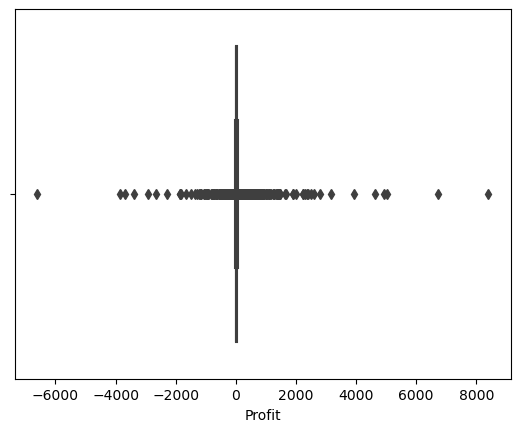

In [57]:
 # valores atipicos Profit
    
    
sns.boxplot(data=df, x="Profit", palette="tab10")
 

<Axes: xlabel='Sales'>

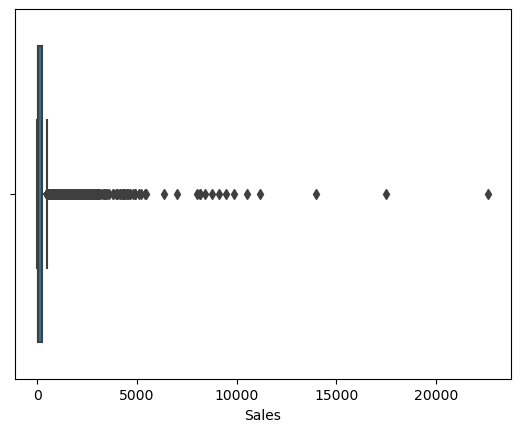

In [58]:
 # valores atipicos sales
    

sns.boxplot(data=df, x="Sales", palette="tab10")

<Axes: xlabel='Quantity'>

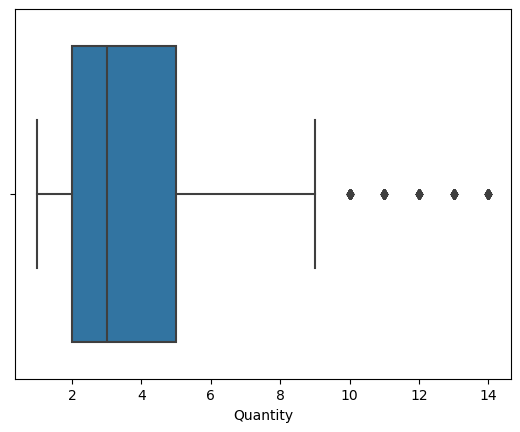

In [59]:
 # valores atipicos quantity
    

sns.boxplot(data=df, x="Quantity", palette="tab10")

<Axes: xlabel='Discount'>

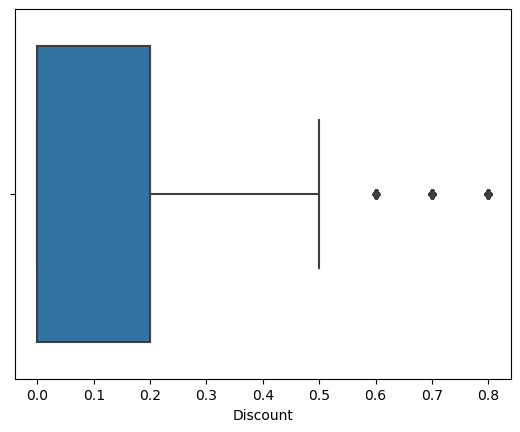

In [60]:
 # valores atipicos discount
    

sns.boxplot(data=df, x="Discount", palette="tab10")

<Axes: xlabel='Segment_'>

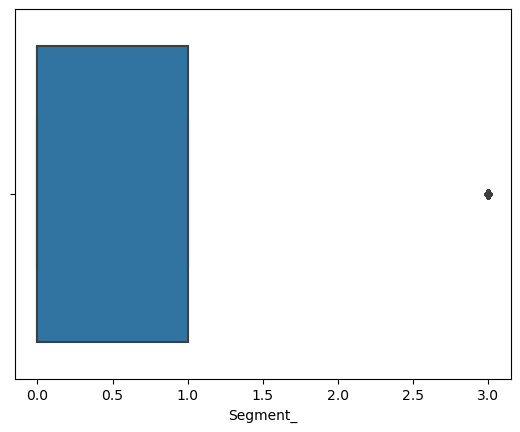

In [61]:
# valores atipicos Segment_
    

sns.boxplot(data=df, x="Segment_", palette="tab10")

<Axes: xlabel='Region_'>

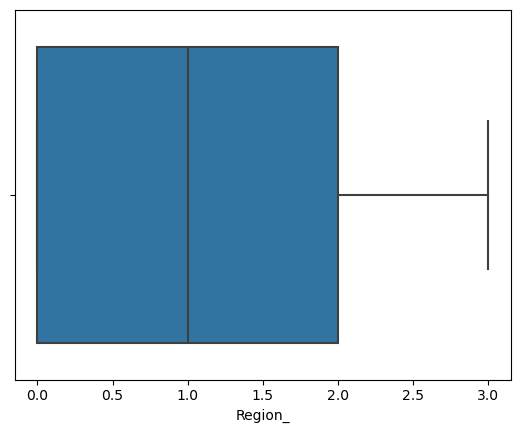

In [62]:
# valores atipicos Segment_
    

sns.boxplot(data=df, x="Region_", palette="tab10")


<Axes: xlabel='Category_'>

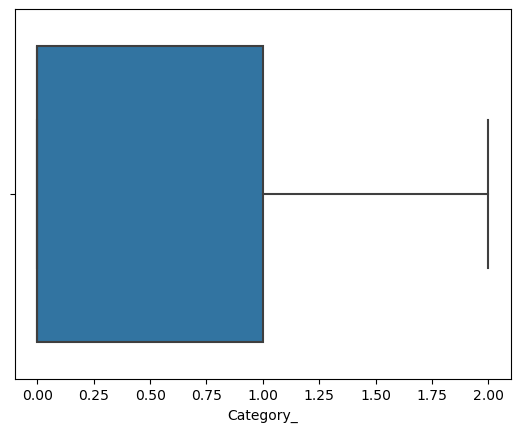

In [63]:
# valores atipicos Category_ 
    

sns.boxplot(data=df, x="Category_", palette="tab10")

## Verificación de errores de entrada:
* Confirmo que la variable Quantity no es float

In [64]:
# se verifican errores de entrada si los datos no son flot

# Escoge las columnas Sales y Profit
df_0 = df[["Sales", "Profit", "Discount", "Quantity"]]

# Verifica si los valores de las columnas "Sales" y "Profit" son float64
def is_float64(column):
    return column.dtype == float

for col in ["Sales", "Profit", "Discount", "Quantity"]:
    if not is_float64(df_0[col]):
        # Si no son float64, imprime el error
        print(f"Error: La columna {col} no es float64")

Error: La columna Quantity no es float64


## Grafica pairplot para las variables de mi interés: 

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

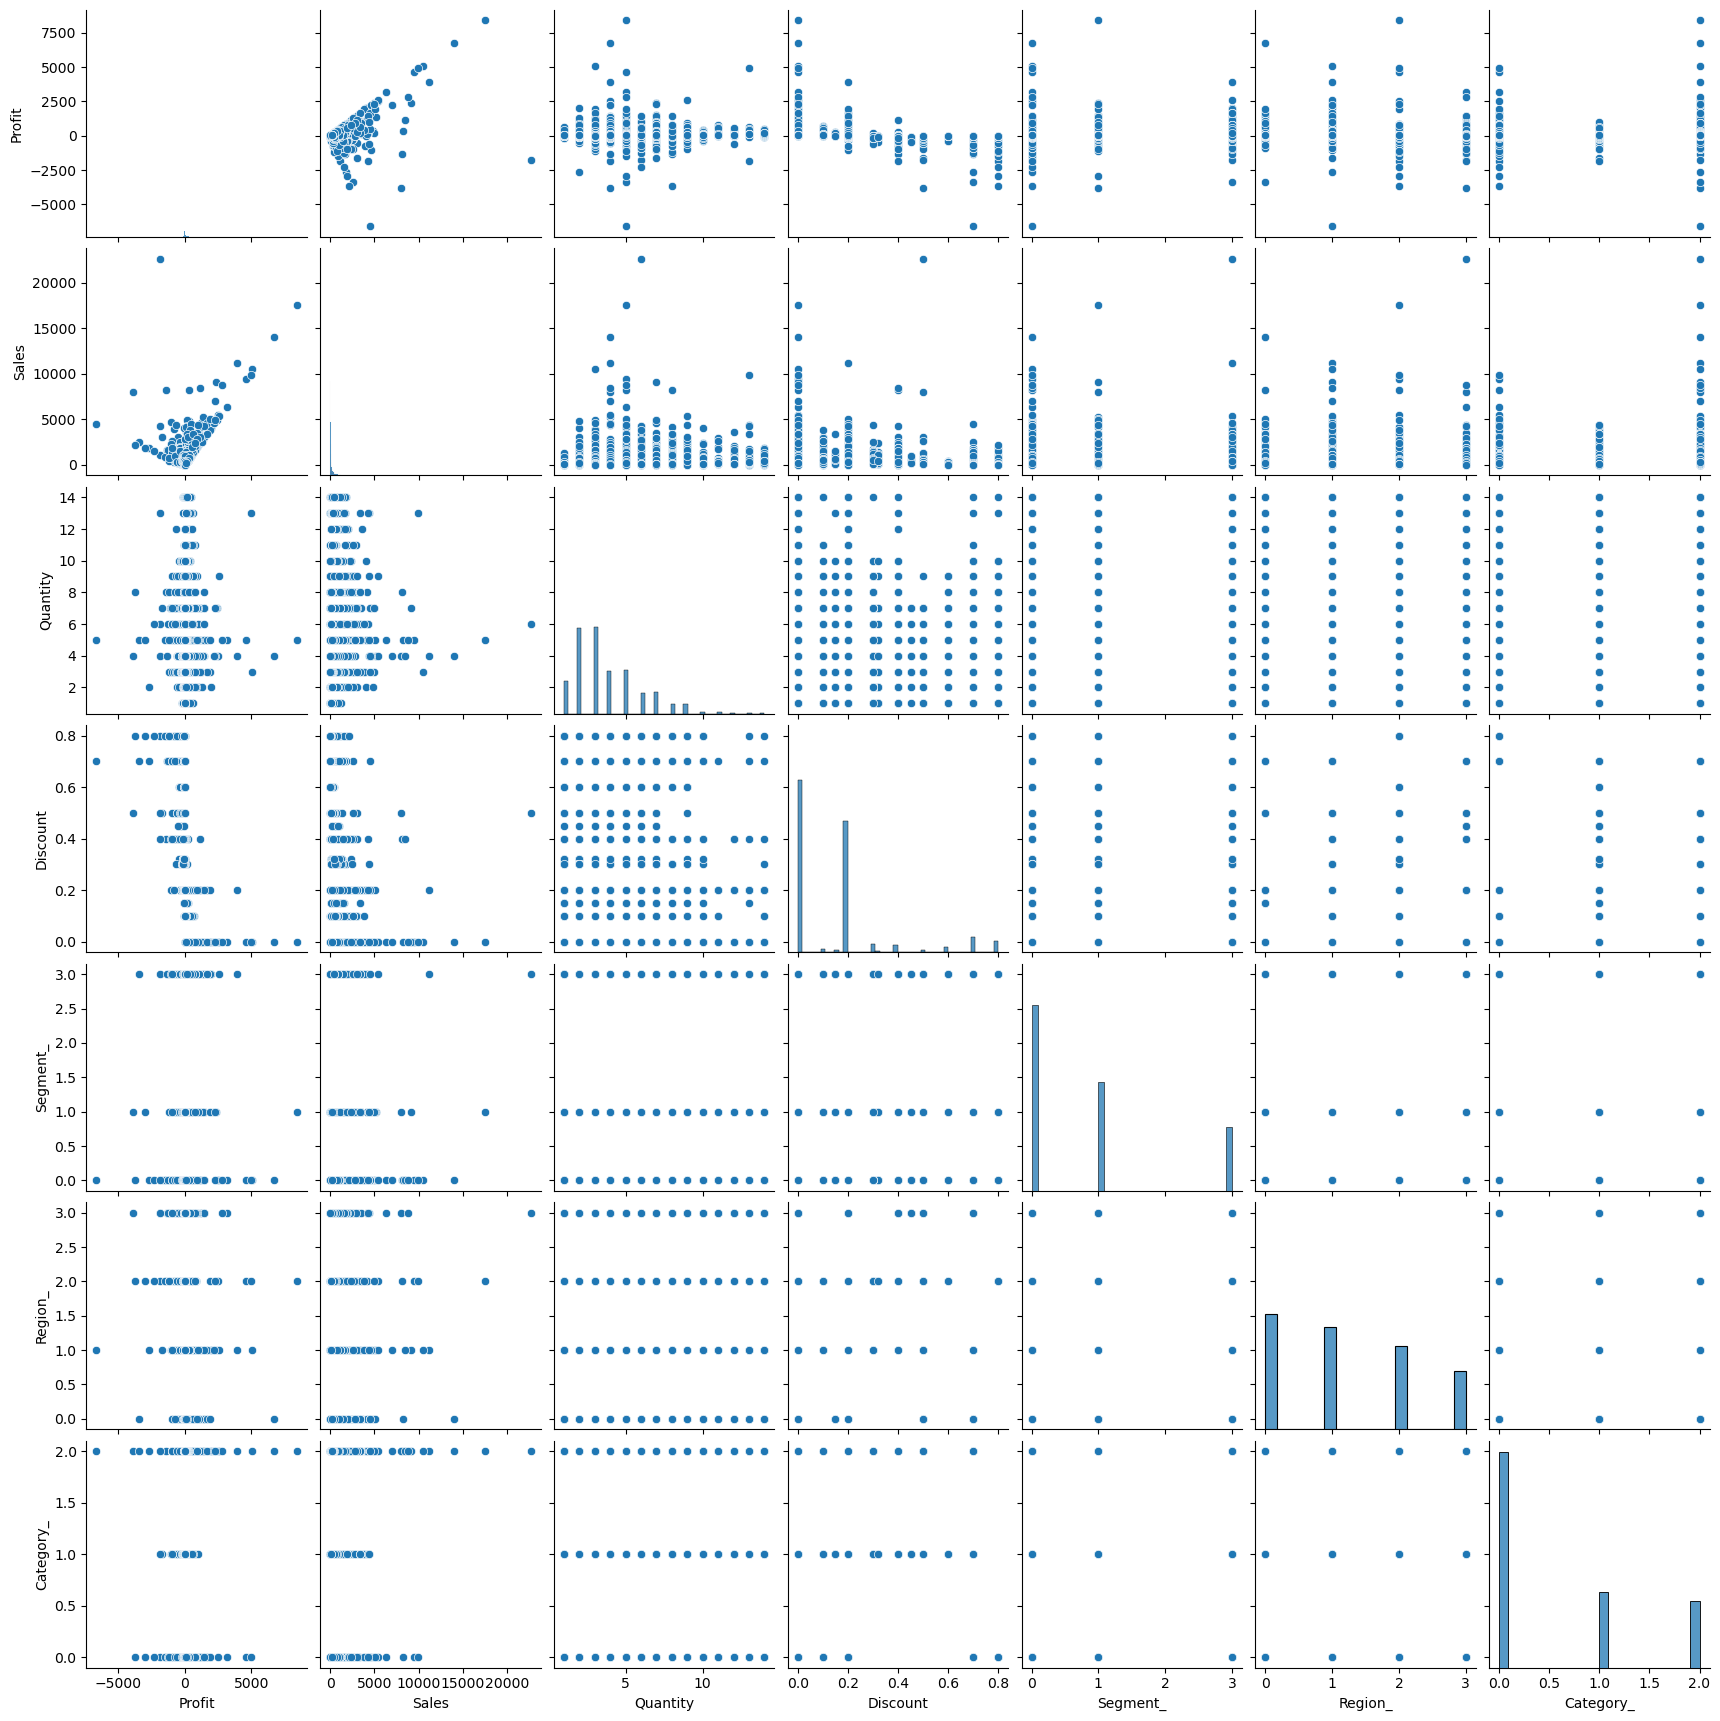

In [65]:
selec = df[["Profit", "Sales", "Quantity", "Discount", "Segment_", "Region_", "Category_"]]
sns.pairplot(selec)

## Se observa que no existe indicios de correlación fuerte con la variable de "Profit", la mayor correlación  de Profit se da con la variable Sales:

In [66]:
# correlaciones antes de linealizar

df[["Profit", "Sales", "Quantity", "Discount", "Segment_", "Region_", "Category_"]].corr()

,Profit,Sales,Quantity,Discount,Segment_,Region_,Category_
Profit,1.000000,0.479064,0.066253,-0.219487,0.012850,-0.017099,0.077870
Sales,0.479064,1.000000,0.200795,-0.028190,0.010440,0.002514,0.221010
Quantity,0.066253,0.200795,1.000000,0.008623,0.005120,-0.000479,-0.007489
Discount,-0.219487,-0.028190,0.008623,1.000000,-0.018718,0.143373,-0.031344
Segment_,0.012850,0.010440,0.005120,-0.018718,1.000000,-0.000874,0.002618
Region_,-0.017099,0.002514,-0.000479,0.143373,-0.000874,1.000000,-0.014468
Category_,0.077870,0.221010,-0.007489,-0.031344,0.002618,-0.014468,1.000000


## Matriz de correlaciones:

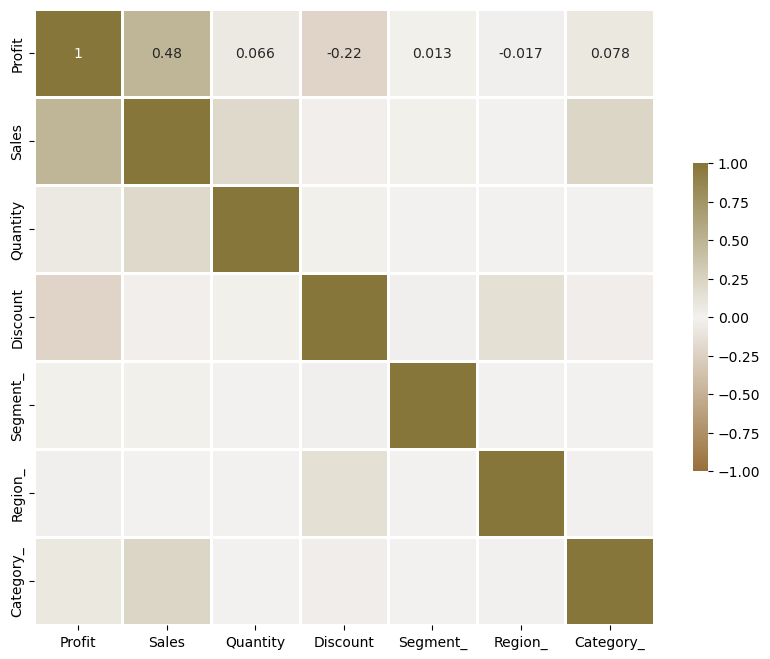

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define el tamaño de la figura
plt.figure(figsize=(10, 8)) 

# Plotea la matriz
sns.heatmap(data=df[["Profit", "Sales", "Quantity", "Discount", "Segment_", "Region_", "Category_"]].corr(),
            cmap=sns.diverging_palette(50, 430, as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.8,
            cbar_kws={"shrink": 0.5},
            annot=True)

# Muestra el gráfico
plt.show()


## Tipos de formato para las variables de df:

In [69]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Segment_           int64
Region_            int64
Category_          int64
dtype: object

## Selección de la variable Profit:

In [70]:
# Seleccionamos la variable 2
raw_0 = df.iloc[:, 20]

In [71]:
print(raw_0)

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

In [72]:

# Añadimos la variable al dataframe
#df = df.assign(raw=raw)

# Escalamiento max-min
max_raw = max(raw_0)
min_raw = min(raw_0)
scaled_0 = (2*raw_0 - max_raw -min_raw)/(max_raw - min_raw) 

# Normalización Z-score
avg = np.average(raw_0)
std = np.std(raw_0)
z_scaled_0 = (raw_0 - avg)/std

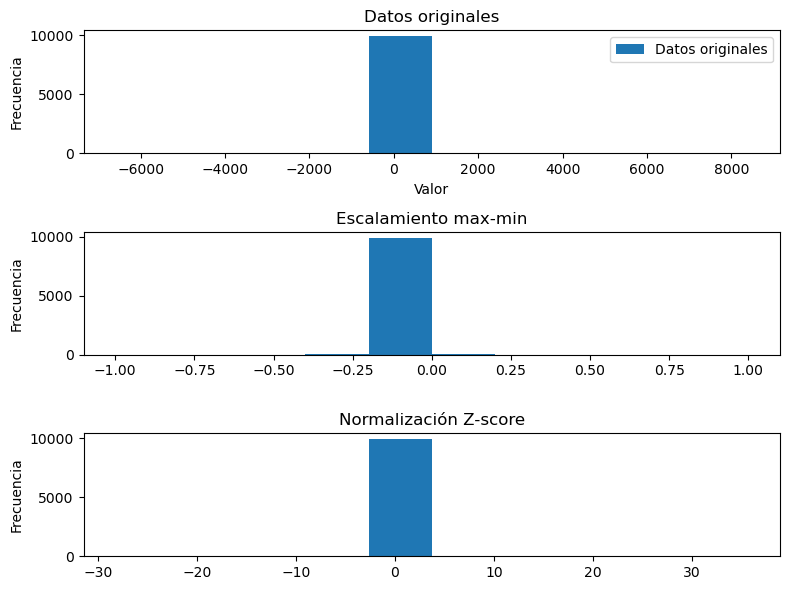

In [73]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_0, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_0, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_0, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad para la variable Profit:
* Se observa una distribución con ligera tendencia a ser normal 

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Profit', ylabel='Density'>

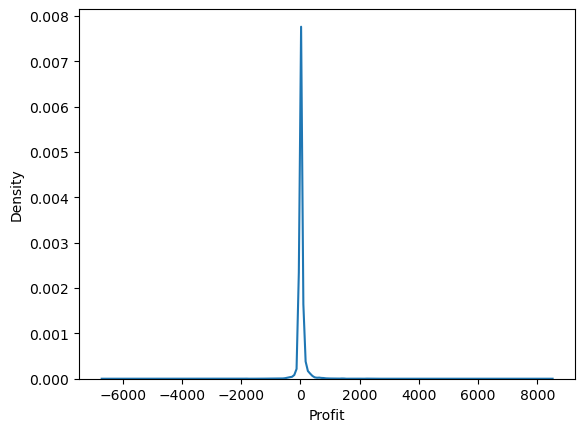

In [74]:
sns.kdeplot(df["Profit"])

## Datos estadísticos de la variable Profit: 

In [75]:
stats_0 = df.Profit.describe()
stats_0

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

## Selección de la variable Quantity:

In [76]:
# Seleccionamos la variable quantity
raw_1 = df.iloc[:, 18]

# Escalamiento max-min
max_raw = max(raw_1)
min_raw = min(raw_1)
scaled_1 = (2*raw_1 - max_raw -min_raw)/(max_raw- min_raw) 

# Normalización Z-score
avg = np.average(raw_1)
std = np.std(raw_1)
z_scaled_1 = (raw_1 - avg)/std

In [77]:
print(raw_1)

0       2
1       3
2       2
3       5
4       2
       ..
9989    3
9990    2
9991    2
9992    4
9993    2
Name: Quantity, Length: 9994, dtype: int64


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

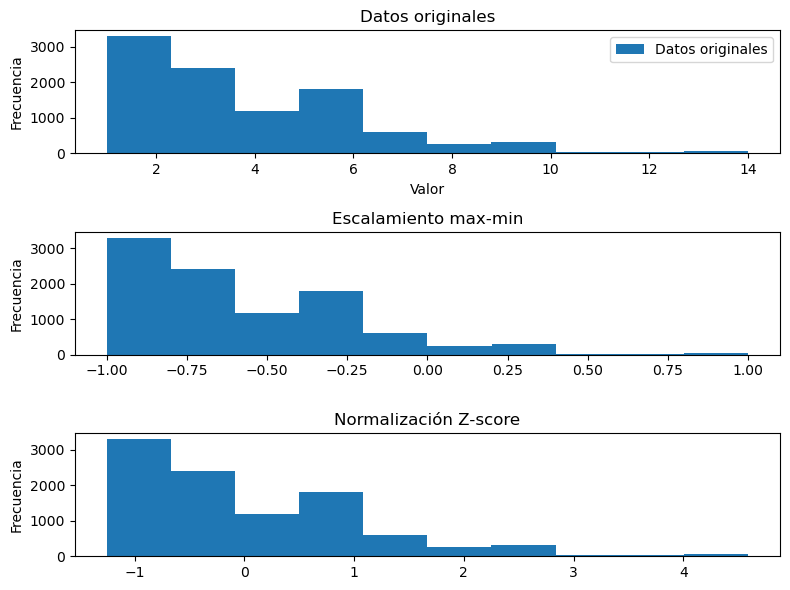

In [78]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_1, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_1, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_1, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad para la variable Quantity:
*  Se observa una distribución no normal 

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Quantity', ylabel='Density'>

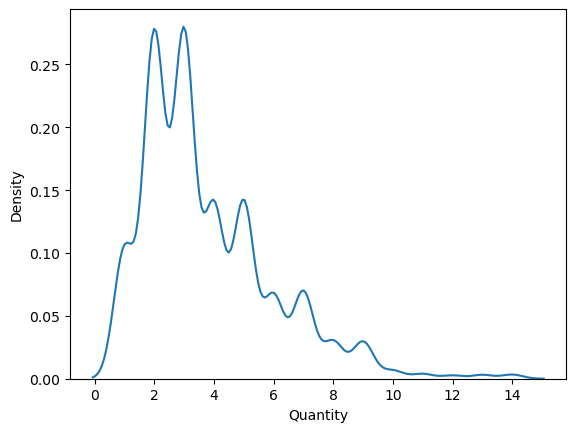

In [79]:
sns.kdeplot(df["Quantity"])

## Datos estadísticos de la variable Quantity: 

In [80]:
stats_2 = df.Quantity.describe()
stats_2

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

## Selección de la variable Sales:

In [81]:
# Seleccionamos la variable sales
raw_2 = df.iloc[:, 17]

# Escalamiento max-min
max_raw = max(raw_2)
min_raw = min(raw_2)
scaled_2 = (2*raw_2 - max_raw -min_raw)/(max_raw- min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_2)
std = np.std(raw_2)
z_scaled_2 = (raw_2 - avg)/std

In [82]:
print(raw_2)

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

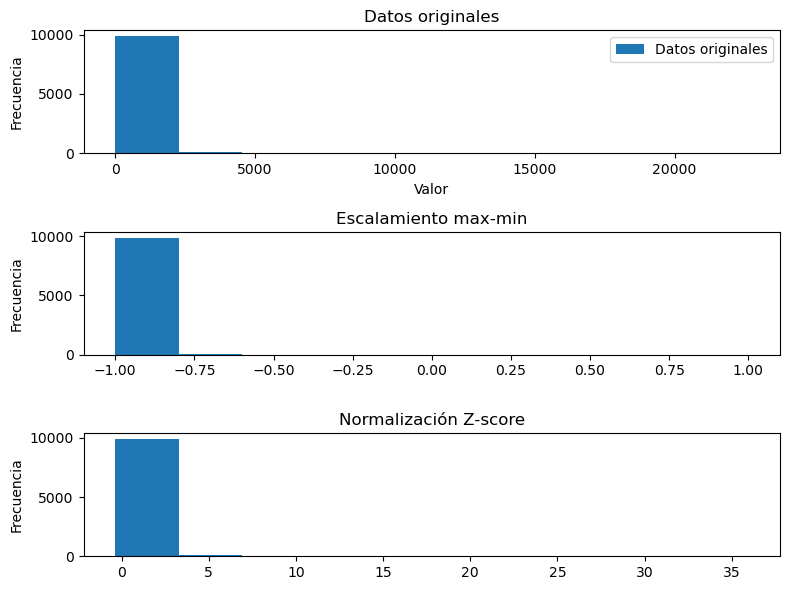

In [83]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_2, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_2, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_2, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad para la variable Sales:
* Se visualiza una distribución no normal 

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Density'>

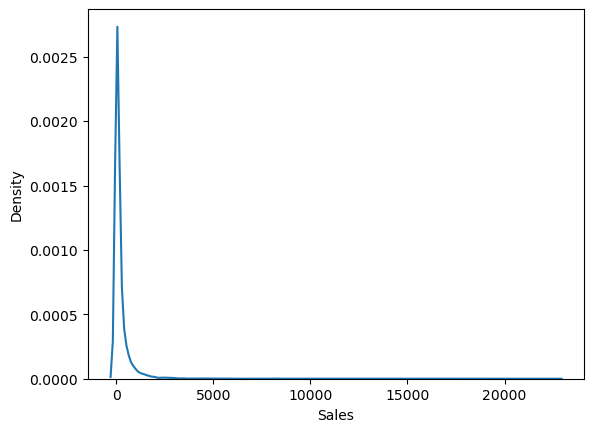

In [84]:
sns.kdeplot(df["Sales"])

## Datos estadísticos de la variable Sales: 

In [85]:
stats_4 = df.Sales.describe()
stats_4

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

## Selección de la variable Discount:

In [86]:
# Seleccionamos la variable sales
raw_3 = df.iloc[:, 19]

# Escalamiento max-min
max_raw = max(raw_3)
min_raw = min(raw_3)
scaled_3 = (2*raw_3 - max_raw -min_raw)/(max_raw- min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_3)
std = np.std(raw_3)
z_scaled_3 = (raw_3 - avg)/std

In [87]:
print(raw_3)

0       0.00
1       0.00
2       0.00
3       0.45
4       0.20
        ... 
9989    0.20
9990    0.00
9991    0.20
9992    0.00
9993    0.00
Name: Discount, Length: 9994, dtype: float64


## escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

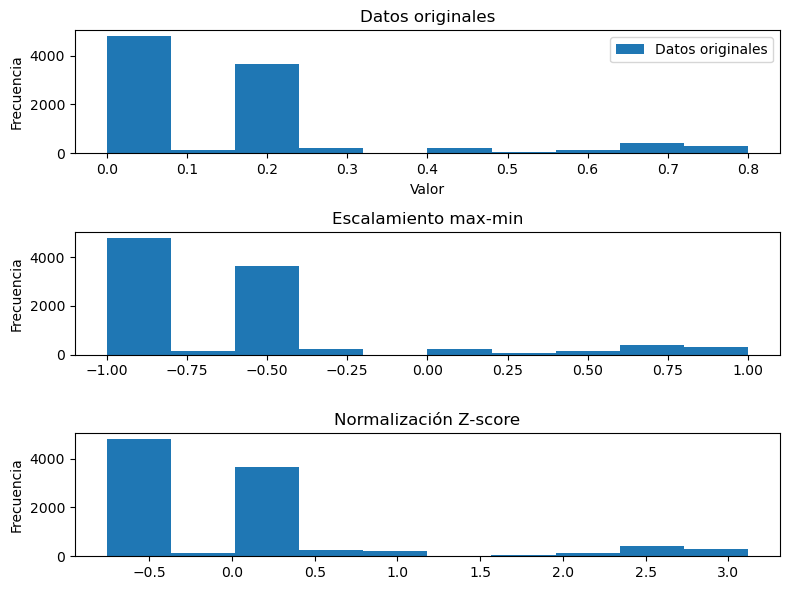

In [88]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_3, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_3, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_3, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad para la variable Discout:
* Se visualiza una distribución no normal 

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Discount', ylabel='Density'>

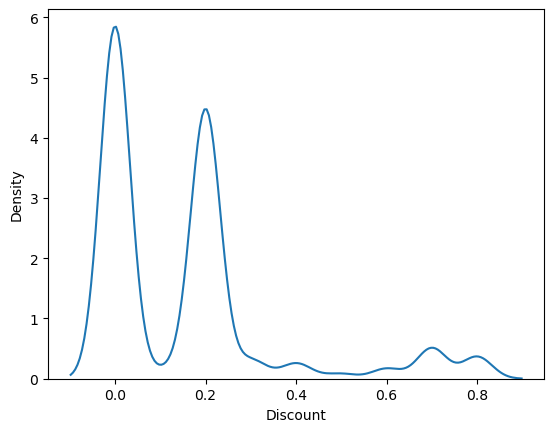

In [89]:
sns.kdeplot(df["Discount"])

## Datos estadísticos de la variable Discount: 

In [90]:
stats_6 = df.Discount.describe()
stats_6

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

## Tipos de formato de las variables en df:

In [91]:
df.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Segment_           int64
Region_            int64
Category_          int64
dtype: object

## Selección de la variable Segment_:

In [93]:
# Seleccionamos la variable 
raw_4 = df.iloc[:, 21]

# Escalamiento max-min
max_raw = max(raw_4)
min_raw = min(raw_4)
scaled_4 = (2*raw_4 - max_raw -min_raw)/(max_raw- min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_4)
std = np.std(raw_4)
z_scaled_4 = (raw_4 - avg)/std

In [94]:
print(raw_4)

0       0
1       0
2       1
3       0
4       0
       ..
9989    0
9990    0
9991    0
9992    0
9993    0
Name: Segment_, Length: 9994, dtype: int64


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

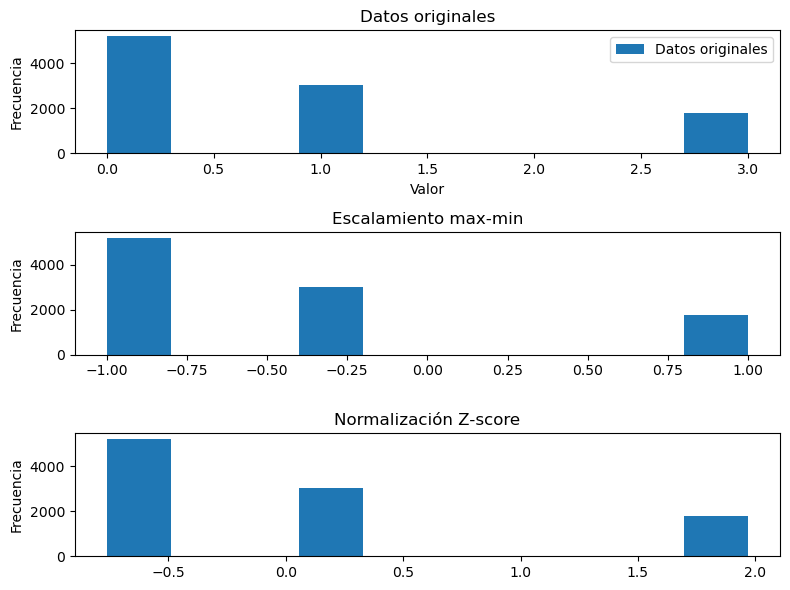

In [95]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_4, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_4, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_4, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad no normal:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Segment_', ylabel='Density'>

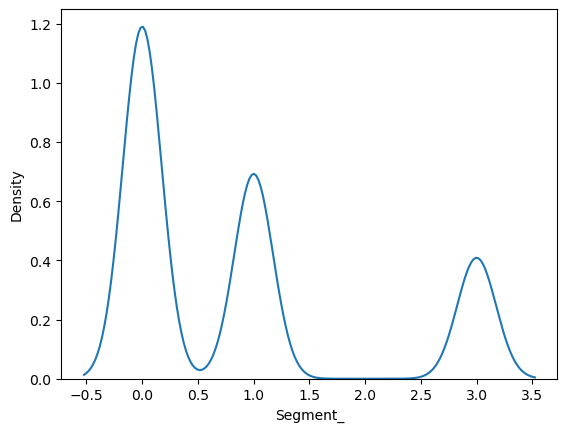

In [96]:
sns.kdeplot(df["Segment_"])

## Datos estadísticos de la variable Segment_: 

In [97]:
stats_8 = df.Segment_.describe()
stats_8

count    9994.000000
mean        0.837402
std         1.098509
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Segment_, dtype: float64

## Selección de la variable Region_:

In [100]:
# Seleccionamos la variable 
raw_5 = df.iloc[:, 22]

# Escalamiento max-min
max_raw = max(raw_5)
min_raw = min(raw_5)
scaled_5 = (2*raw_5 - max_raw -min_raw)/(max_raw- min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_5)
std = np.std(raw_5)
z_scaled_5 = (raw_5 - avg)/std

In [101]:
print(raw_5)

0       3
1       3
2       0
3       3
4       3
       ..
9989    3
9990    0
9991    0
9992    0
9993    0
Name: Region_, Length: 9994, dtype: int64


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

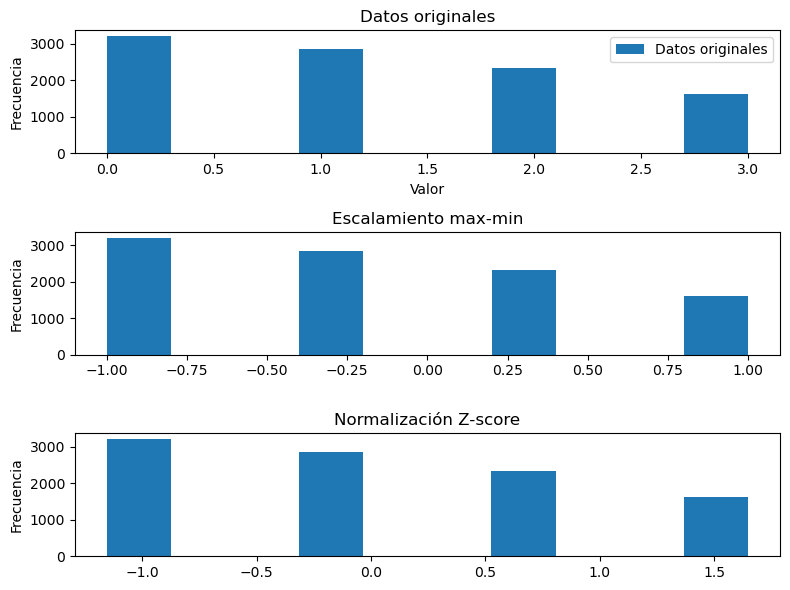

In [102]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_5, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_5, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_5, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad no normal:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Region_', ylabel='Density'>

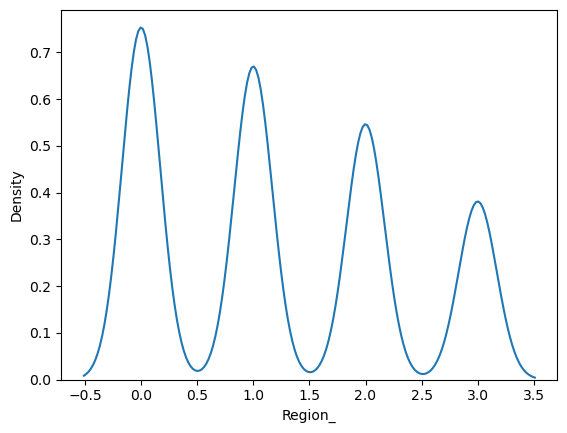

In [103]:
sns.kdeplot(df["Region_"])

## Datos estadísticos de la variable Region_: 

In [104]:
stats_10 = df.Region_.describe()
stats_10

count    9994.000000
mean        1.236142
std         1.070361
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Region_, dtype: float64

## Selección de la variable Category_:

In [105]:
# Seleccionamos la variable 
raw_6 = df.iloc[:, 23]

# Escalamiento max-min
max_raw = max(raw_6)
min_raw = min(raw_6)
scaled_6 = (2*raw_6 - max_raw -min_raw)/(max_raw- min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_6)
std = np.std(raw_6)
z_scaled_6 = (raw_6 - avg)/std

In [106]:
print(raw_6)

0       1
1       1
2       0
3       1
4       0
       ..
9989    1
9990    1
9991    2
9992    0
9993    0
Name: Category_, Length: 9994, dtype: int64


## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

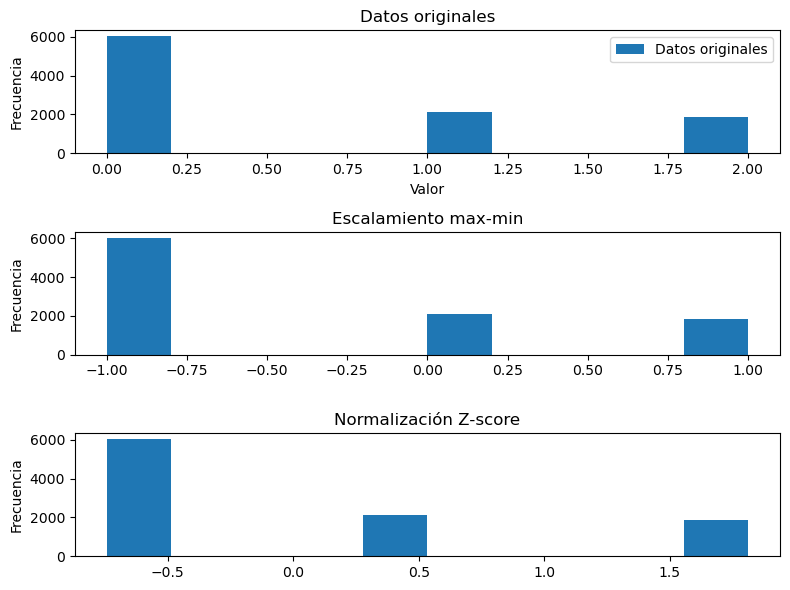

In [107]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_6, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_6, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_6, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Distribución de densidad no normal:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Category_', ylabel='Density'>

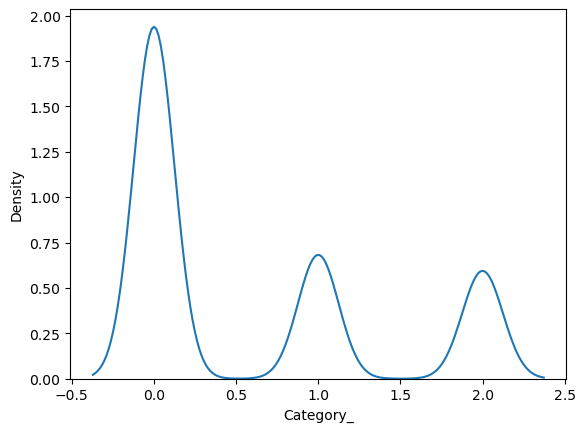

In [108]:
sns.kdeplot(df["Category_"])

## Datos estadísticos de la variable Category_: 

In [109]:
stats_12 = df.Category_.describe()
stats_12

count    9994.000000
mean        0.581849
std         0.782933
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Category_, dtype: float64


## Correlaciones de variables antes de linealizarlas: 

In [110]:
# correlaciones de variables sin linealizar ni normalizar

# Selecciona las variables a correlacionar
variables_corr = ["Category_", "Region_", "Segment_", "Discount",  "Sales",  "Quantity", "Profit", "Quantity"]

# Calcula la correlación entre las variables
correlations = df[variables_corr].corr()

# Imprime la matriz de correlación
print(correlations)

           Category_   Region_  Segment_  Discount     Sales  Quantity  \
Category_   1.000000 -0.014468  0.002618 -0.031344  0.221010 -0.007489   
Region_    -0.014468  1.000000 -0.000874  0.143373  0.002514 -0.000479   
Segment_    0.002618 -0.000874  1.000000 -0.018718  0.010440  0.005120   
Discount   -0.031344  0.143373 -0.018718  1.000000 -0.028190  0.008623   
Sales       0.221010  0.002514  0.010440 -0.028190  1.000000  0.200795   
Quantity   -0.007489 -0.000479  0.005120  0.008623  0.200795  1.000000   
Profit      0.077870 -0.017099  0.012850 -0.219487  0.479064  0.066253   
Quantity   -0.007489 -0.000479  0.005120  0.008623  0.200795  1.000000   

             Profit  Quantity  
Category_  0.077870 -0.007489  
Region_   -0.017099 -0.000479  
Segment_   0.012850  0.005120  
Discount  -0.219487  0.008623  
Sales      0.479064  0.200795  
Quantity   0.066253  1.000000  
Profit     1.000000  0.066253  
Quantity   0.066253  1.000000  


## Matriz de correlaciones: 

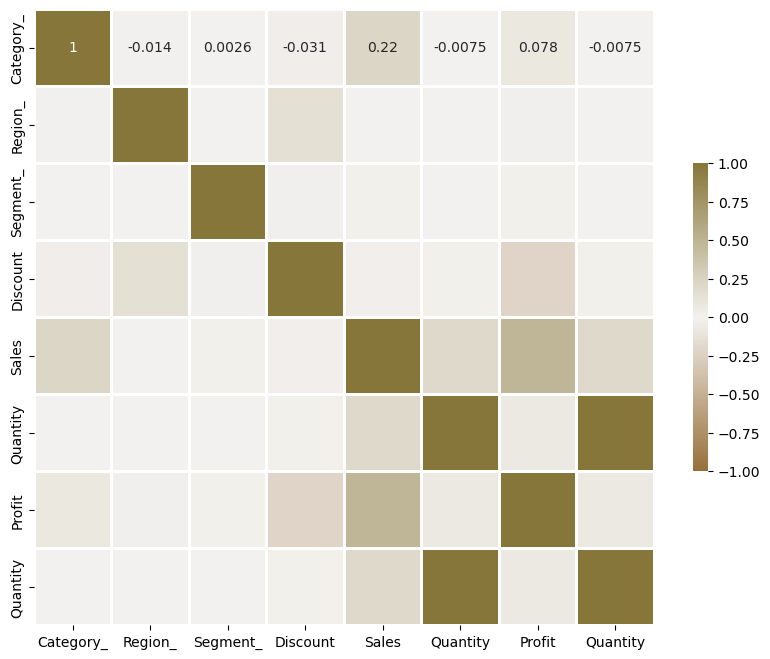

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define el tamaño de la figura
plt.figure(figsize=(10, 8)) 

# Plotea la matriz
sns.heatmap(data=df[variables_corr].corr(),
            cmap=sns.diverging_palette(50, 430, as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.8,
            cbar_kws={"shrink": 0.5},
            annot=True)

# Muestra el gráfico
plt.show()


In [112]:
# Imprime el nombre de las columnas
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Segment_',
       'Region_', 'Category_'],
      dtype='object')


## Linealización de variables: 
* Creación de nuevas columnas en donde se almacenan las variables linealizadas
* Determinación de valores nulos


In [113]:

# Creamos  nuevas columnas para almacenar solamente la linealización

df['lineal_Segment_'] = df['Segment_'].transform(lambda x: scipy.stats.norm(stats_8['mean'], stats_8['std']).pdf(x))
df['lineal_Category_'] = df['Category_'].transform(lambda x: scipy.stats.norm(stats_12['mean'], stats_12['std']).pdf(x))
df['lineal_Region_'] = df['Region_'].transform(lambda x: scipy.stats.norm(stats_10['mean'], stats_10['std']).pdf(x))
df['lineal_Discount'] = df['Discount'].transform(lambda x: scipy.stats.norm(stats_6['mean'], stats_6['std']).pdf(x))
df['lineal_Sales'] = df['Sales'].transform(lambda x: scipy.stats.norm(stats_4['mean'], stats_4['std']).pdf(x))
df['lineal_Quantity'] = df['Quantity'].transform(lambda x: scipy.stats.norm(stats_2['mean'], stats_2['std']).pdf(x))
df['lineal_Profit'] = df['Profit'].transform(lambda x: scipy.stats.norm(stats_0['mean'], stats_0['std']).pdf(x))

# valores nulos 

print(df.isnull().sum())

# Imprimimos el dataframe
print(df)


Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Segment_            0
Region_             0
Category_           0
lineal_Segment_     0
lineal_Category_    0
lineal_Region_      0
lineal_Discount     0
lineal_Sales        0
lineal_Quantity     0
lineal_Profit       0
dtype: int64
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-

## Comparación de la variable linealizada Segment_ con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


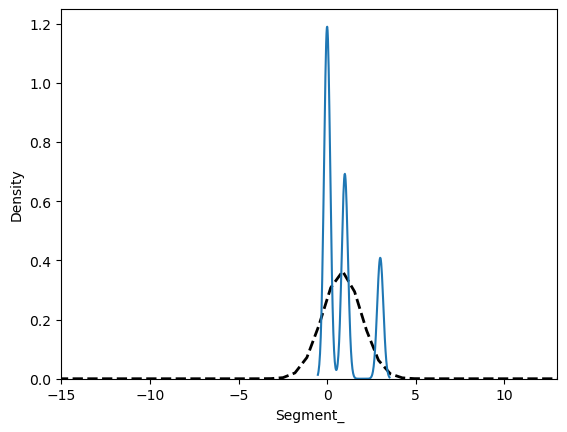

In [114]:
# linealizacion de segment_
xs = np.linspace(stats_8['min'] -20, stats_8['max']+ 10 )
ys = scipy.stats.norm(stats_8['mean'], stats_8['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Segment_'
)
# Disminuye la escala en el eje x
plt.xlim(stats_8['min'] -15, stats_8['max'] +10)

# Muestra el gráfico
plt.show()

## Comparación de la variable linealizada Category_ con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


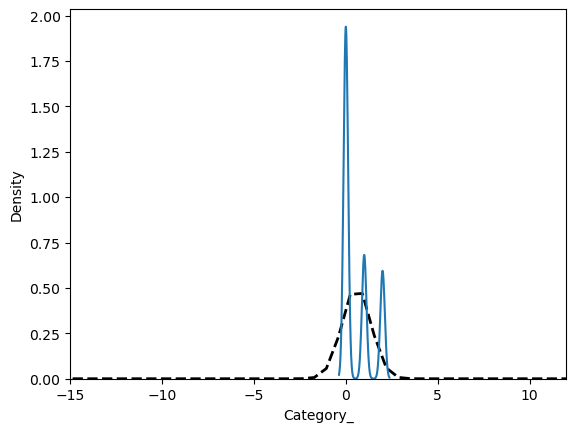

In [115]:
# linealizacion de category_
xs = np.linspace(stats_12['min'] -20, stats_12['max']+ 10 )
ys = scipy.stats.norm(stats_12['mean'], stats_12['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Category_'
)
# Disminuye la escala en el eje x
plt.xlim(stats_12['min'] -15, stats_12['max'] +10)

# Muestra el gráfico
plt.show()


## Comparación de la variable linealizada Region_ con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


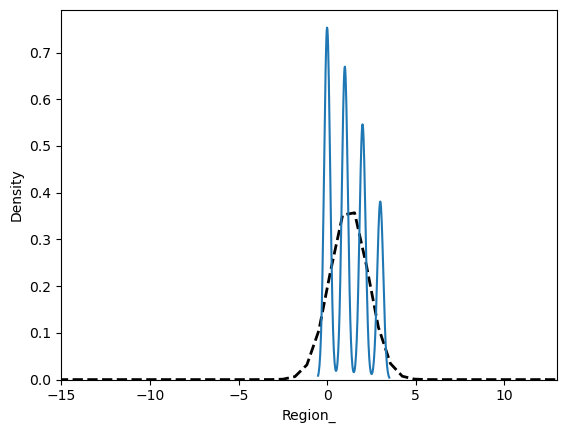

In [116]:
# linealizacion de region_
xs = np.linspace(stats_10['min'] -20, stats_10['max']+ 10 )
ys = scipy.stats.norm(stats_10['mean'], stats_10['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Region_'
)
# Disminuye la escala en el eje x
plt.xlim(stats_10['min'] -15, stats_10['max'] +10)

# Muestra el gráfico
plt.show()

## Comparación de la variable linealizada Discount con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


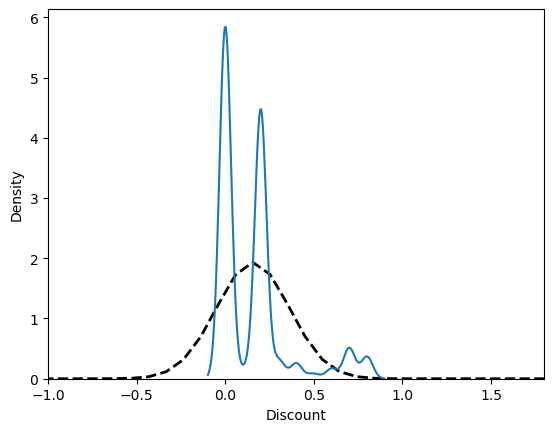

In [117]:
# linealizacion de discount_
xs = np.linspace(stats_6['min'] -2, stats_6['max']+ 2 )
ys = scipy.stats.norm(stats_6['mean'], stats_6['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Discount'
)
# Disminuye la escala en el eje x
plt.xlim(stats_6['min'] -1, stats_6['max'] + 1)

# Muestra el gráfico
plt.show()


## Comparación de la variable linealizada Sales con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


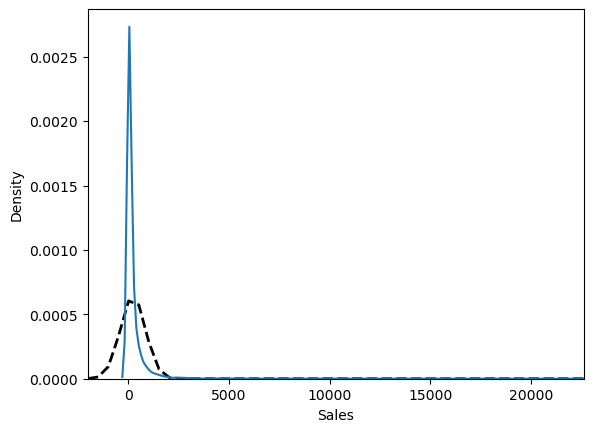

In [118]:
# linealizacion de sales
xs = np.linspace(stats_4['min'] -2000, stats_4['max']+ 80 )
ys = scipy.stats.norm(stats_4['mean'], stats_4['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Sales'
)
# Disminuye la escala en el eje x
plt.xlim(stats_4['min'] -2000, stats_4['max'] + 5)

# Muestra el gráfico
plt.show()

## Comparación de la variable linealizada Quantity con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


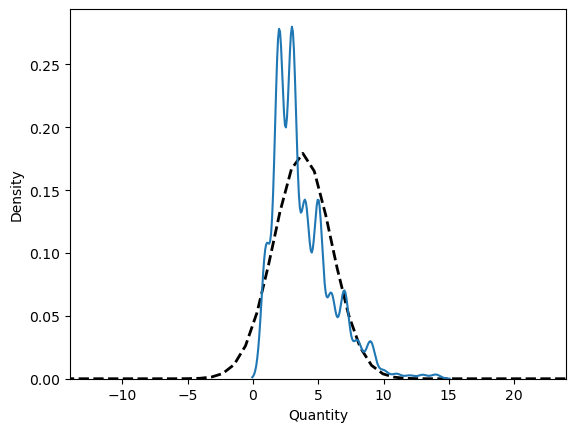

In [119]:
# linealizacion de quantity
xs = np.linspace(stats_2['min'] -20, stats_2['max']+ 10 )
ys = scipy.stats.norm(stats_2['mean'], stats_2['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Quantity'
)
# Disminuye la escala en el eje x
plt.xlim(stats_2['min'] -15, stats_2['max'] +10)

# Muestra el gráfico
plt.show()

## Comparación de la variable linealizada Profit con la distribución de densidad original de la variable

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


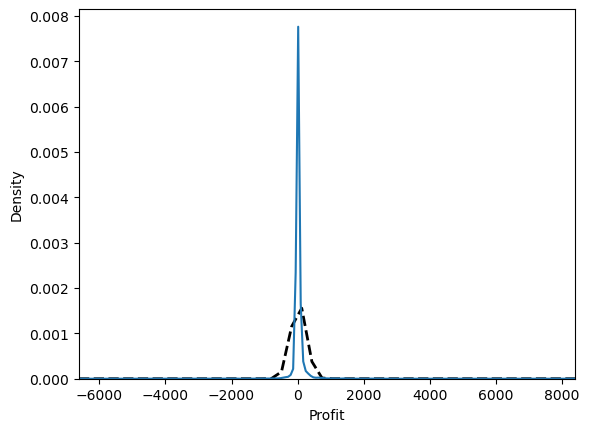

In [120]:
# linealizacion de profit
xs = np.linspace(stats_0['min'] -20, stats_0['max']+ 10 )
ys = scipy.stats.norm(stats_0['mean'], stats_0['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed', linewidth=2)

sns.kdeplot(
    data=df,
    x='Profit'
)
# Disminuye la escala en el eje x
plt.xlim(stats_0['min'] -15, stats_0['max'] +10)

# Muestra el gráfico
plt.show()

## Determinación de valores nulos:

In [121]:
# valores nulos 

print(df.isnull().sum())

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Segment_            0
Region_             0
Category_           0
lineal_Segment_     0
lineal_Category_    0
lineal_Region_      0
lineal_Discount     0
lineal_Sales        0
lineal_Quantity     0
lineal_Profit       0
dtype: int64


## Método PCA:

In [122]:
# inicio del metodo pca

# Obtiene las variables numericas
df_pca = df[['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity', 'lineal_Profit']]

# Imprime las variables numericas
print(df_pca)

      lineal_Segment_  lineal_Category_  lineal_Region_  lineal_Discount  \
0            0.271593          0.441820        0.095872         1.451392   
1            0.271593          0.441820        0.095872         1.451392   
2            0.359210          0.386595        0.191319         1.451392   
3            0.271593          0.441820        0.095872         0.701997   
4            0.271593          0.386595        0.095872         1.889376   
...               ...               ...             ...              ...   
9989         0.271593          0.441820        0.095872         1.889376   
9990         0.271593          0.441820        0.191319         1.451392   
9991         0.271593          0.098797        0.191319         1.889376   
9992         0.271593          0.386595        0.191319         1.451392   
9993         0.271593          0.386595        0.191319         1.451392   

      lineal_Sales  lineal_Quantity  lineal_Profit  
0         0.000639         0.12974

## Matriz de correlaciones:
* se observa correlaciones debiles de Profit con la mayoria de las variables excepto con lineal_Sales

In [123]:
df_pca.corr()


,lineal_Segment_,lineal_Category_,lineal_Region_,lineal_Discount,lineal_Sales,lineal_Quantity,lineal_Profit
lineal_Segment_,1.000000,0.009024,-0.008158,0.003296,0.001568,0.000258,0.005039
lineal_Category_,0.009024,1.000000,-0.003350,-0.100076,0.087177,-0.008830,0.100850
lineal_Region_,-0.008158,-0.003350,1.000000,-0.084878,0.001347,-0.000154,-0.034434
lineal_Discount,0.003296,-0.100076,-0.084878,1.000000,-0.010638,0.007742,0.160027
lineal_Sales,0.001568,0.087177,0.001347,-0.010638,1.000000,0.121210,0.749098
lineal_Quantity,0.000258,-0.008830,-0.000154,0.007742,0.121210,1.000000,0.095087
lineal_Profit,0.005039,0.100850,-0.034434,0.160027,0.749098,0.095087,1.000000


## Covarianza:

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(
    df_pca.values
    )

covariance_matrix = np.cov(scaled.T) 
covariance_matrix 


array([[ 1.00010007e+00,  9.02477133e-03, -8.15870068e-03,
         3.29588518e-03,  1.56821393e-03,  2.57918648e-04,
         5.03902334e-03],
       [ 9.02477133e-03,  1.00010007e+00, -3.35022950e-03,
        -1.00086198e-01,  8.71855217e-02, -8.83120112e-03,
         1.00860253e-01],
       [-8.15870068e-03, -3.35022950e-03,  1.00010007e+00,
        -8.48867410e-02,  1.34727901e-03, -1.53585220e-04,
        -3.44371904e-02],
       [ 3.29588518e-03, -1.00086198e-01, -8.48867410e-02,
         1.00010007e+00, -1.06394810e-02,  7.74267403e-03,
         1.60043113e-01],
       [ 1.56821393e-03,  8.71855217e-02,  1.34727901e-03,
        -1.06394810e-02,  1.00010007e+00,  1.21221997e-01,
         7.49173159e-01],
       [ 2.57918648e-04, -8.83120112e-03, -1.53585220e-04,
         7.74267403e-03,  1.21221997e-01,  1.00010007e+00,
         9.50967408e-02],
       [ 5.03902334e-03,  1.00860253e-01, -3.44371904e-02,
         1.60043113e-01,  7.49173159e-01,  9.50967408e-02,
         1.0001000

## Visualización de las variables:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

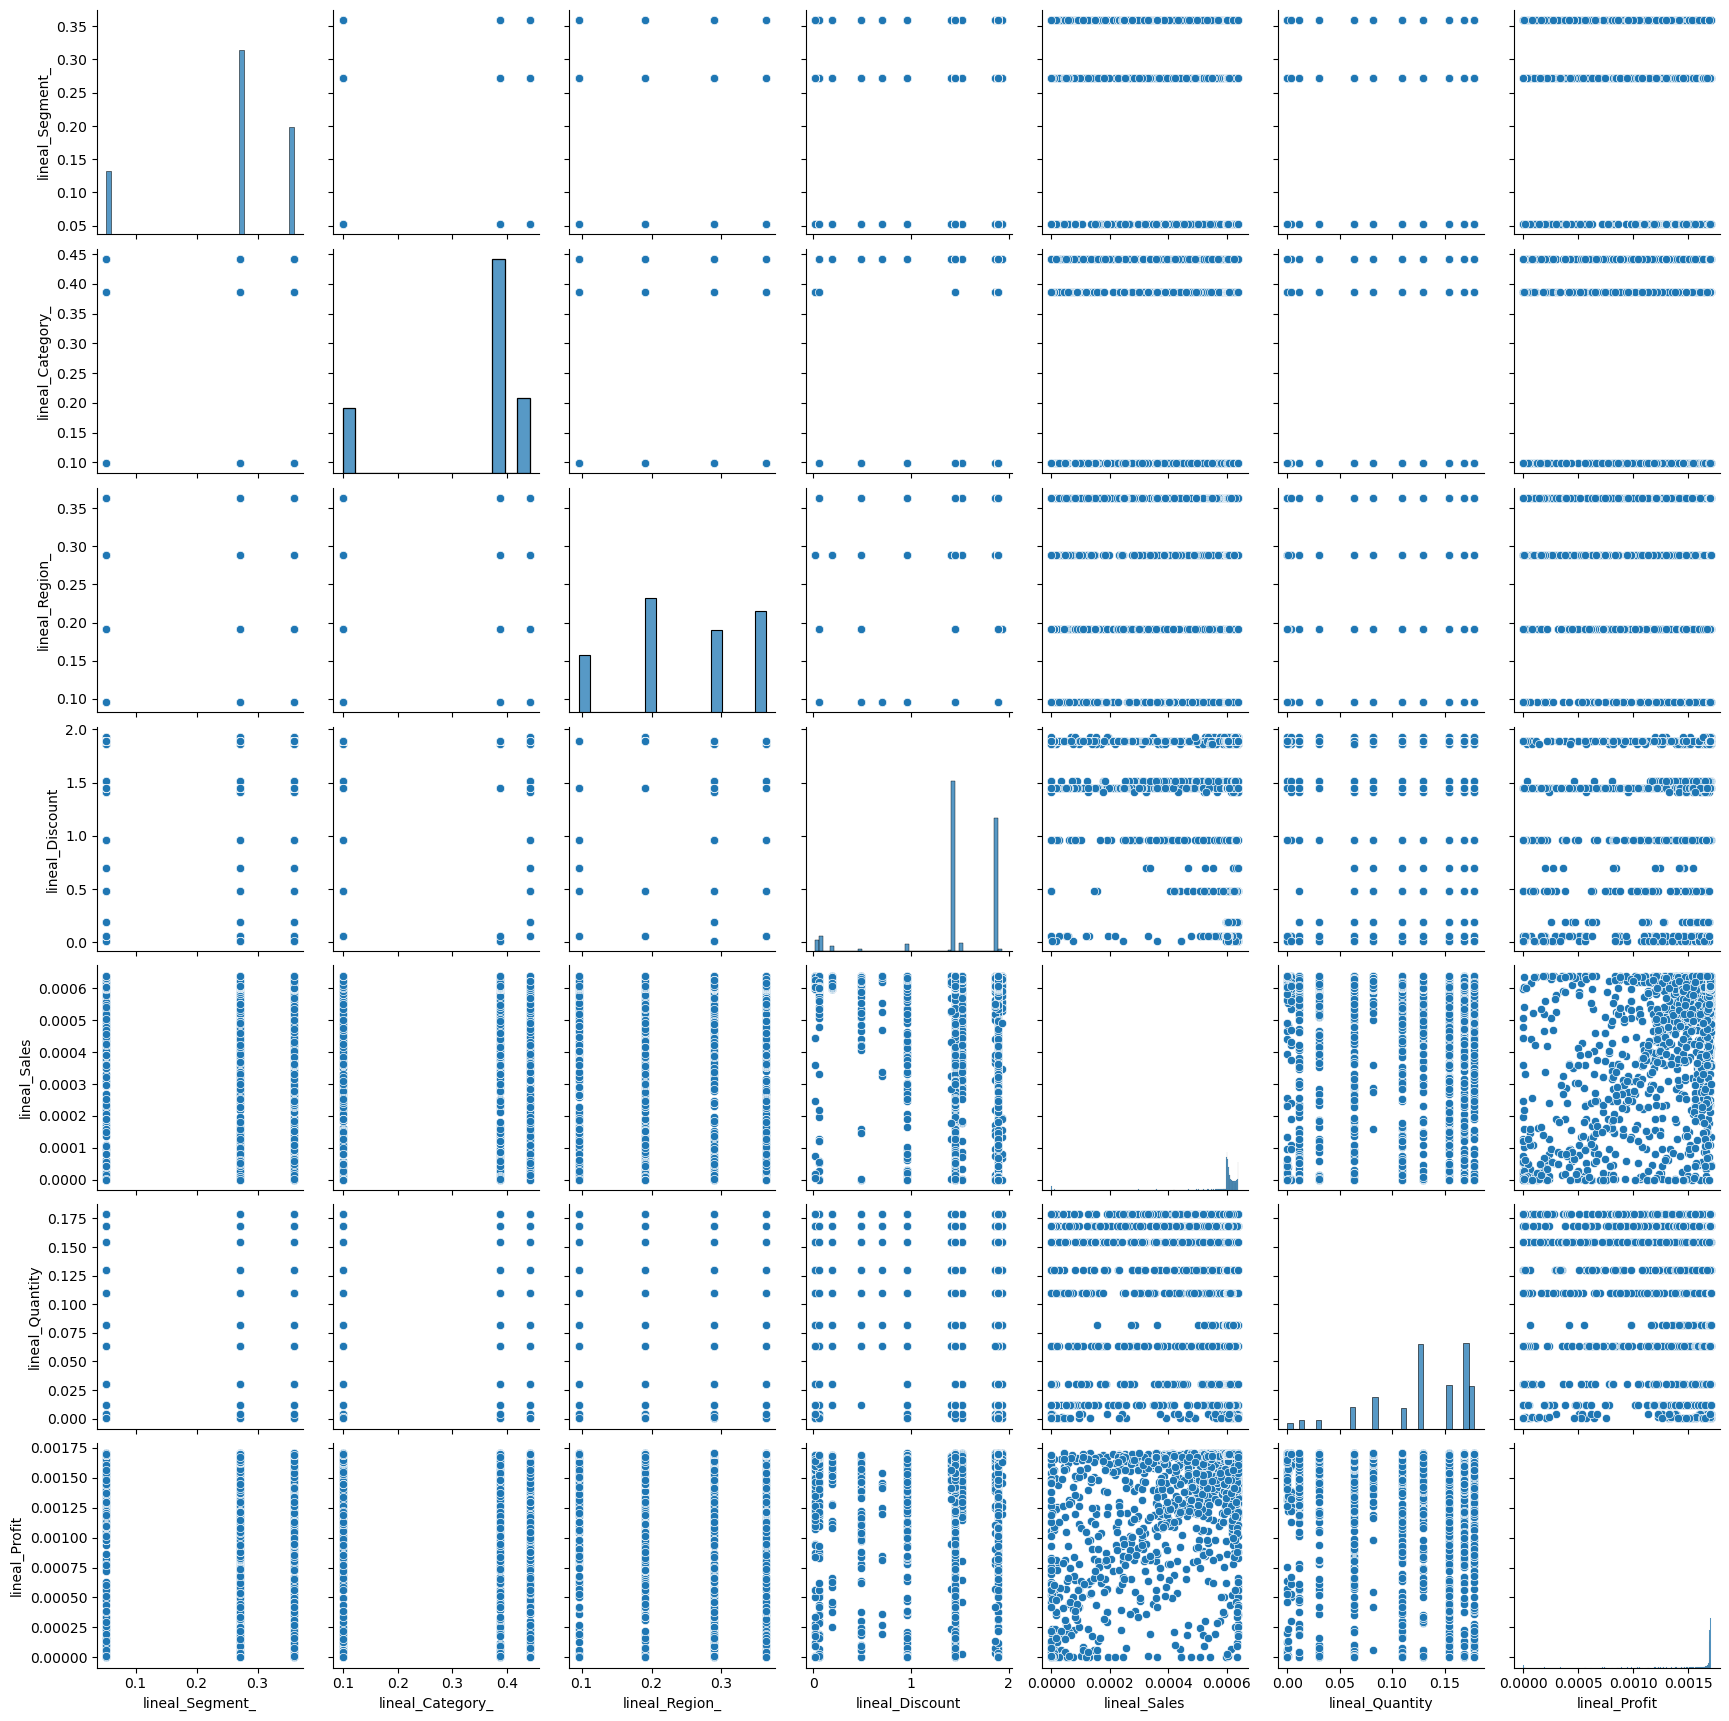

In [125]:
sns.pairplot(df_pca)

## Eigenvectores y eigenvalores:

In [127]:
#eigenvalores:

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix) 


In [128]:
eigen_values 

array([1.81129118, 0.23027055, 1.13912168, 0.84951001, 1.01549283,
       0.99427204, 0.96074221])

In [129]:
eigen_vectors 

array([[ 0.00810622,  0.00197468, -0.00917174,  0.02706164, -0.55226832,
        -0.82230383, -0.13390317],
       [ 0.14236338,  0.03485019,  0.52986314, -0.60662817, -0.46362567,
         0.24968805,  0.22906891],
       [-0.04088435, -0.01504201,  0.43905621, -0.36134252,  0.53259143,
        -0.28420816, -0.55707766],
       [ 0.11542577,  0.1593576 , -0.71693224, -0.63722302, -0.01863345,
         0.03353286, -0.19941255],
       [ 0.67663706,  0.68875697,  0.09584961,  0.21724804,  0.03829864,
         0.00488648, -0.09950676],
       [ 0.18138208, -0.02246511, -0.02522551, -0.21136977,  0.44080167,
        -0.42166219,  0.74106494],
       [ 0.68842948, -0.70588215, -0.05074698,  0.05267291, -0.01664984,
         0.04184119, -0.14289034]])

## Valor propio:
* no se observan variables con valores elevados para llegar a concluir que se hace viable reduccir dimensiones

In [131]:
# cuanto porcentaje es cada valor propio:

variance_explained = [] # vacio
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100) 

print(variance_explained)

[25.872999107793188, 3.2892501640960408, 16.271538569967696, 12.134643004400594, 14.50558878288053, 14.202464989091862, 13.72351538177008]


## Se conservan las  7 variables

In [133]:
# aplicacion de PCA:

from sklearn.decomposition import PCA 

pca = PCA(n_components=7) 
pca.fit(scaled) 


PCA(n_components=7)

In [134]:
pca.explained_variance_ratio_

array([0.25872999, 0.16271539, 0.14505589, 0.14202465, 0.13723515,
       0.12134643, 0.0328925 ])

## Regresión lineal con las variables linealizadas con ajuste de hiperparametros:
* Las métricas muestran un buen rendimiento con un R2 de 0.63 y con un mse y un mae pequeños, estos resultados son adecuados teniendo en cuenta que se linealizaron las variables

In [136]:

# randonmized con variables solo linealizadas

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']

y_col = ['lineal_Profit']


X = df[X_cols].values
y = df[y_col].values



# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

# Definir los hiperparámetros a ajustar
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False]}

# Crear el modelo de regresión lineal
lr = LinearRegression()

# Crear el objeto de búsqueda de hiperparámetros
clf = GridSearchCV(lr, parameters)

# Ajustar el modelo con búsqueda de hiperparámetros
clf.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = clf.best_params_

# Obtener el mejor modelo
best_model = clf.best_estimator_

# Predecir los valores de prueba usando el mejor modelo
y_pred = best_model.predict(X_test)


# adicione Y_pred al dataframe
#df = add_predictions_to_dataframe(df, y_pred)

# Convertir y_pred a un DataFrame
df_pred = pd.DataFrame(y_pred, columns=['y_pred'])

# Concatenar los datos originales con las predicciones
df_with_pred = pd.concat([df, df_pred], axis=1)

print(df_with_pred)


# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento
r2 = r2_score(y_test, y_pred)

# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("MSE del mejor modelo:", mse)
print("MAE del mejor modelo:", mae)
print("R2 del mejor modelo:", r2)

# Verificar que el dataframe no tenga valores nulos en variables independientes
for col in X_cols:
    if df_with_pred[col].isnull().sum() > 0:
        print("La columna {} tiene valores nulos".format(col))
else:
    print("El dataframe no tiene valores nulos en variables independientes")

# Verificar que el dataframe no tenga valores nulos en variable dependiente
for col in y_col:
    if df_with_pred[col].isnull().sum() > 0:
        print("La columna {} tiene valores nulos".format(col))
else:
    print("El dataframe no tiene valores nulos en la variable dependiente")




      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

## Aplicación de regularización:
Se obtiene bajas perdidas con lasso, lo cual indica que están bien linealizadas las variables


In [137]:

# aplicacion de regularizacion

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_cols = ['lineal_Sales', 'lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Quantity']

y_col = ['lineal_Profit']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)

# Aplicar la regularización Lasso
modelLasso = Lasso(alpha=0.2).fit(X_train, y_train)
y_predict_lasso = modelLasso.predict(X_test)
lasso_loss = mean_squared_error(y_test, y_predict_lasso)
print("Lasso Loss:", lasso_loss)
print("Coeficientes Lasso:", modelLasso.coef_)

# Aplicar la regularización Ridge
modelRidge = Ridge(alpha=1).fit(X_train, y_train)
y_predict_ridge = modelRidge.predict(X_test)
ridge_loss = mean_squared_error(y_test, y_predict_ridge)
print("Ridge Loss:", ridge_loss)
print("Coeficientes Ridge:", modelRidge.coef_)


Lasso Loss: 9.41631284472431e-08
Coeficientes Lasso: [ 0.  0. -0.  0.  0.  0.]
Ridge Loss: 8.992777599572678e-08
Coeficientes Ridge: [[ 8.74376933e-06  2.70927656e-04 -6.17987457e-05  9.63012542e-05
   1.64302130e-04  4.88921957e-04]]


## Aplicando a las variables linealizadas el modelo Lasso y el modelo Ridge:
* Se obtienen los coeficientes tanto de Lasso como Ridge pequeños
* Se aplico tanto el modelo Lasso como el modelo Ridge pero no se obtuvieron tan buenos resultados como los obtenidos con el modelo de regresión lineal anterior


In [138]:
# identificando variables de lasso y ridge

# Identificar variables en Lasso Loss
print("Coeficientes Lasso:")
for col, coef in zip(X_cols, modelLasso.coef_):
    print(col, ":", coef)

# Identificar variables en Ridge Loss
print("Coeficientes Ridge:")
for col, coef in zip(X_cols, modelRidge.coef_[0]):
    print(col, ":", coef)

Coeficientes Lasso:
lineal_Sales : 0.0
lineal_Segment_ : 0.0
lineal_Category_ : -0.0
lineal_Region_ : 0.0
lineal_Discount : 0.0
lineal_Quantity : 0.0
Coeficientes Ridge:
lineal_Sales : 8.743769327921282e-06
lineal_Segment_ : 0.000270927656030414
lineal_Category_ : -6.179874566402142e-05
lineal_Region_ : 9.630125423656419e-05
lineal_Discount : 0.00016430212960540536
lineal_Quantity : 0.0004889219569856658


## Ajuste del modelo de regresión lineal a los datos originales:
* Se obtienen un R2 un poco mas bajo (0.6) pero sigue siendo una buena métrica, también los valores mae y mse son buenos ya que son pequeños

In [139]:

### ajuste del modelo a los datos originales

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']



#X_cols = ['lineal_Sales', 'lineal_Segment_', 'lineal_Category_', 'lineal_Region_']

y_col = ['lineal_Profit']



#value_counts = df["lineal_Profit"].value_counts()
#print(value_counts)
X = df[X_cols].values
y = df[y_col].values


# Definir los hiperparámetros a ajustar
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [-1, 2, 4]}

# Crear el modelo de regresión lineal
lr = LinearRegression()

# Crear el objeto de búsqueda de hiperparámetros
clf = GridSearchCV(lr, parameters)

# Ajustar el modelo al conjunto de datos original
clf.fit(X, y)

# Obtener las predicciones para el conjunto de datos original
y_pred = clf.predict(X)

# Imprimir las predicciones
print(y_pred)

# Convertir y_pred a un DataFrame
df_pred = pd.DataFrame(y_pred, columns=['y_pred'])

# Concatenar los datos originales con las predicciones
df_with_pred = pd.concat([df, df_pred], axis=1)

print(df_with_pred)

# Obtener el número de filas y_pred
n_filas_y_pred = len(y_pred )
print('nuemero de filas de y_pred:',n_filas_y_pred)

# Verificar que la columna "y_pred" ya no tiene valores faltantes
if df_with_pred["y_pred"].isnull().sum() > 0:
    print("La columna y_pred tiene valores nulos")
else:
    print("La columna y_pred no tiene valores nulos")

# Obtener los mejores hiperparámetros
best_params = clf.best_params_

# Obtener el MSE del mejor modelo
best_mse = clf.best_score_


# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento
r2 = r2_score(y, y_pred)
print('r2:',r2)


# Calcular el MAE
mae = mean_absolute_error(y, y_pred)

# Imprimir "Mejores hiperparámetros:", best_params
print("Mejores hiperparámetros:", best_params)

# Imprimir "MSE del mejor modelo:", mse
print("MSE del mejor modelo:", mse)

# Imprimir "MAE del mejor modelo:", mae
print("MAE del mejor modelo:", mae)



[[0.00173384]
 [0.00141501]
 [0.0016561 ]
 ...
 [0.00172783]
 [0.00166539]
 [0.00172232]]
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment

## Se obtiene una valor de validación cruzada relativamente bueno:

In [140]:
# validacion cruzada

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']


y_col = ['lineal_Profit']

X = df[X_cols].values
y = df[y_col].values

# Definir el modelo de regresión lineal
lr = LinearRegression()

# Definir los parámetros de la validación cruzada
cv = 5
scoring = 'r2'

# Realizar la validación cruzada
scores = cross_val_score(lr, X, y, cv=cv, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print('R2 promedio:', np.mean(scores))

R2 promedio: 0.5916864306183364


## Los residuos presentes poseen una escala pequeña cercana a cero:

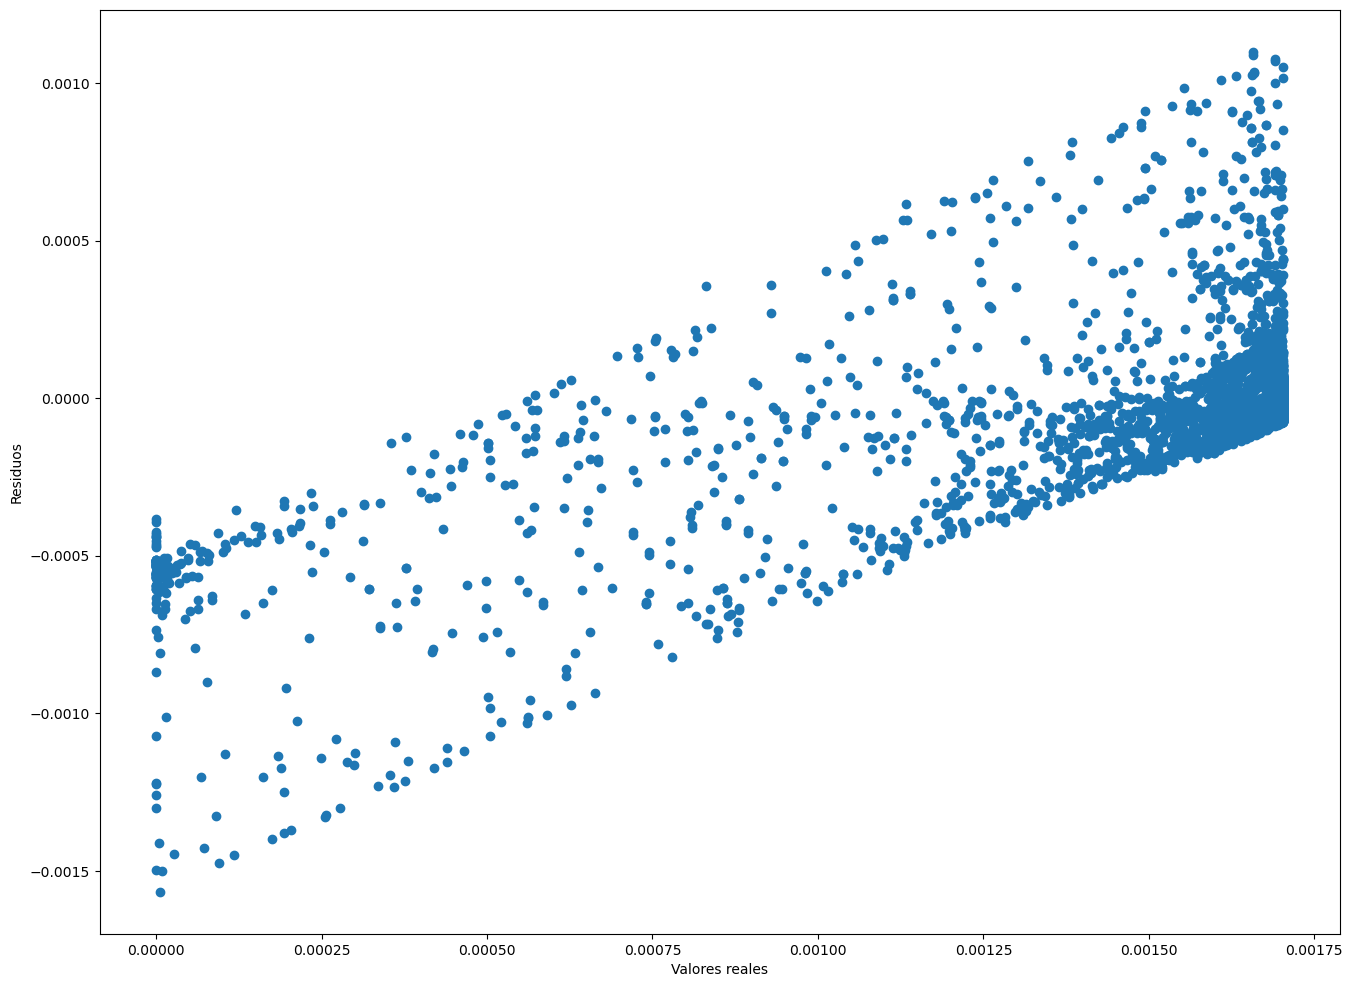

In [141]:
# Calcular los residuos

# Obtener los residuos
residuals = y - y_pred

# Graficar los residuos
plt.figure(figsize=(16, 12))
plt.scatter(y, residuals)
plt.xlabel('Valores reales')
plt.ylabel('Residuos')
plt.show()

## Comparando lineal_profit versus y_pred:
* Se observa una tendencia lineal que a medida que se incrementa los valores del eje x tanbien se incrementan los valores del eje y siendo correcto este comportamiento para los datos analizados

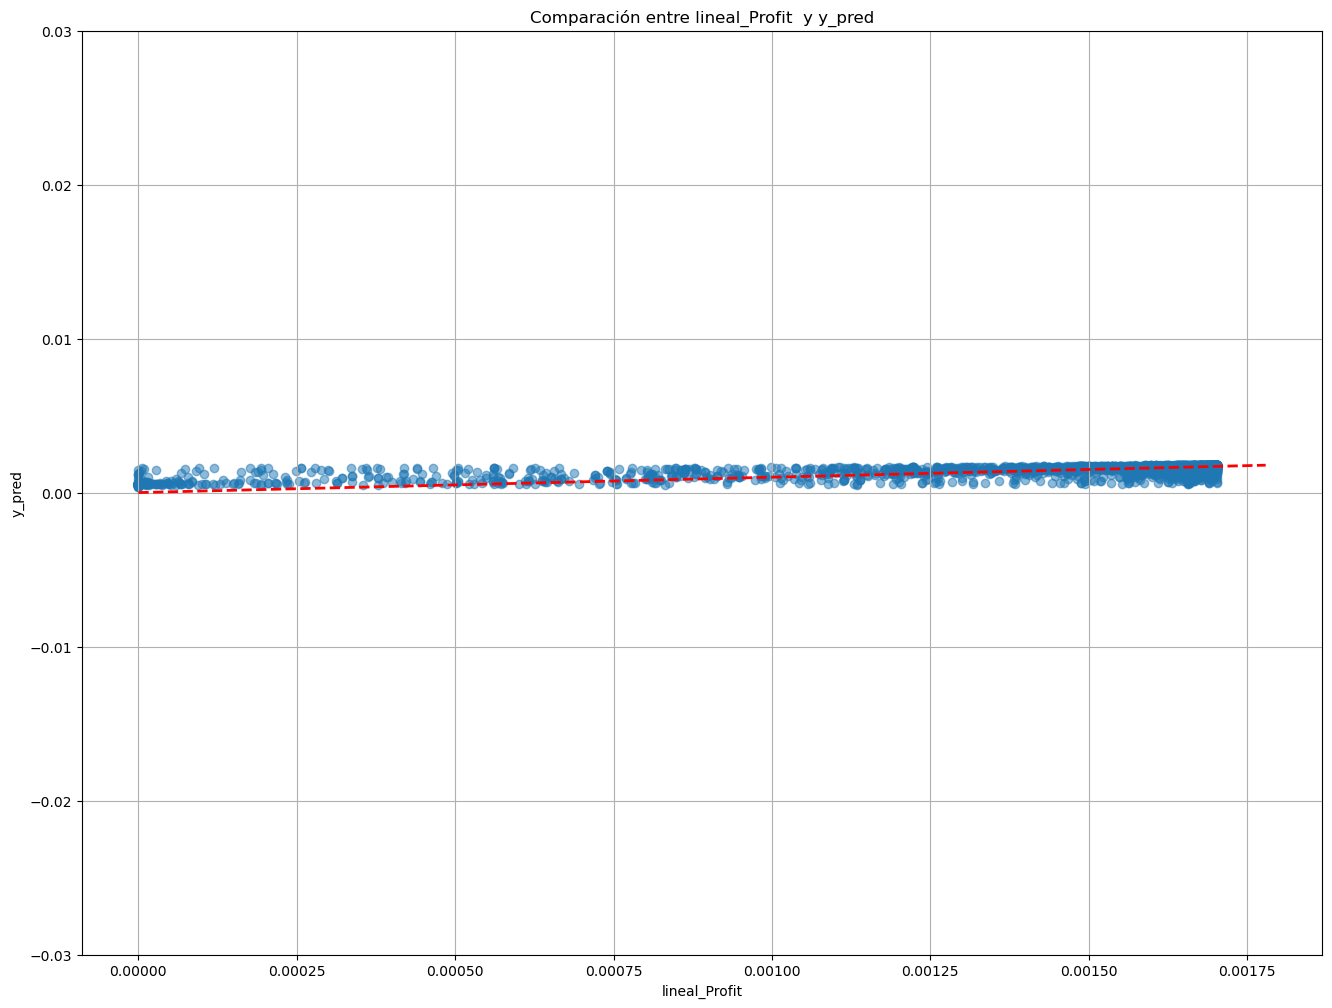

In [142]:
# comparacion entre lineal_profit and  y_pred (valores linealizados)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear un gráfico de dispersión para visualizar la relación entre y_originales y y_predichos

plt.figure(figsize=(16, 12))
plt.scatter(df_with_pred['lineal_Profit'], df_with_pred['y_pred'], alpha=0.5)
plt.xlabel('lineal_Profit')
plt.ylabel('y_pred')
plt.ylim(-0.03, 0.03)
plt.title('Comparación entre lineal_Profit  y y_pred')
plt.grid(True)

# Agregar una línea de regresión para visualizar la tendencia
plt.plot([df_with_pred['lineal_Profit'].min(), df_with_pred['y_pred'].max()], [df_with_pred['lineal_Profit'].min(), df_with_pred['y_pred'].max()], linestyle='--', color='red', linewidth=2)

'''
# Mostrar las métricas en el gráfico
plt.text(0.7, 0.1, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.2, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.3, f'R^2: {r2:.2f}', transform=plt.gca().transAxes)
'''
# Mostrar el gráfico
plt.show()

## Regla de 3 para convertir los valores predichos y_pred a valores con la escala de la variable original a predecir Profit para así poder realizar una comparación:
* Se imprimen los datos estadisticos de d:

In [143]:
# regla de 3

# Calculamos el valor de d

d = df_with_pred['y_pred'] * (df_with_pred['Profit'] / df_with_pred['lineal_Profit'])
stats_p_2 = d.describe()
print(stats_p_2)


count     9.994000e+03
mean     5.110283e+276
std                inf
min     -1.078561e+177
25%       1.711847e+00
50%       8.478423e+00
75%       2.908136e+01
max      5.107217e+280
dtype: float64


C:\Users\Windows\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


## Detectando valores grandes en d:

In [144]:
# detectando valores grandes en d

mayor = d>2000
print(mayor)

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool


## Creación de la columna aprox que contiene los valores predichos:

In [145]:
# creamos la columna aprox en el dataframe

df_with_pred['aprox'] = d

print(df_with_pred)
# variable profit

v_p = df_with_pred['Profit']

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

## Detectando valores grandes en aprox:

In [146]:
# detectando valores grandes en aprox

tolerancia = 1e-6  # Pequeño margen de tolerancia
mayor_ = df_with_pred['aprox'] > (90 - tolerancia)
print(mayor_)

0       False
1        True
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: aprox, Length: 9994, dtype: bool


## Comparando Profit con aprox:

In [147]:
# ver solo 2 columnas (Profit y aprox)

# Utilizar la función tail() para obtener las últimas 50 filas
ultimas_filas = df_with_pred.tail(60)

# Seleccionar las dos columnas deseadas
columnas_deseadas = ultimas_filas[['Profit', 'aprox']]

# Imprimir las últimas 50 filas con las dos columnas seleccionadas
print(columnas_deseadas)

        Profit         aprox
9934    2.5146      2.524791
9935    3.6744      3.691162
9936   48.3771     48.151940
9937   -1.7772     -1.826639
9938   19.9155     19.636897
9939    9.9456      9.718015
9940    4.8160      4.667161
9941   87.1962     88.928337
9942   29.9646     19.390527
9943   13.2990     13.120078
9944    0.4074      0.402359
9945    1.0700      1.062871
9946   32.1300     32.280574
9947  539.2464   2018.777073
9948  793.7160  53852.593184
9949   15.9543     15.487397
9950   14.7593     14.129013
9951    8.6900      8.459192
9952   20.7240     20.956899
9953    3.1104      3.031527
9954   11.5587     11.643616
9955   10.2588     10.694336
9956   21.7845     21.266396
9957  109.7208    117.070239
9958    2.1900      2.120892
9959    1.8688      1.871983
9960    3.2400      3.109128
9961   23.7742     23.988047
9962  -67.6704    -72.836216
9963    3.6288      3.610547
9964    6.4320      6.261975
9965    2.3406      2.266082
9966   51.5543     51.396440
9967   18.0900

## Aplicación del modelo de bosques aleatorios con variables linealizadas:
* Se obtienen mejores métricas que con la regresión lineal con un R2 de 0.84 y un mae y un mse pequeños
* Este modelo es el más optimo a implementar


In [148]:

# RANDOMFOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definir las columnas de las variables independientes y la variable objetivo
X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']
y_col = ['lineal_Profit']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[X_cols].values
y = df[y_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train.ravel())

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento
r2 = r2_score(y_test, y_pred)
print('r2:',r2)


# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)


# Imprimir "MAE del mejor modelo:", mae
print("MAE del mejor modelo:", mae)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Variable': X_cols, 'Importancia': importances})
print(feature_importances)



Error cuadrático medio (MSE): 1.4843373053292731e-08
r2: 0.8407412191103469
MAE del mejor modelo: 4.171279393402033e-05
           Variable  Importancia
0   lineal_Segment_     0.018131
1  lineal_Category_     0.033709
2    lineal_Region_     0.027355
3   lineal_Discount     0.153282
4      lineal_Sales     0.725742
5   lineal_Quantity     0.041780


## Modelo de bosques aleatorios con más hiperparametros
* Se obtienen los mismos resultados del modelo anterior


In [149]:
# AJUSTE HIPERPARAMETROS CON GRIDSEARCH Y VALIDACION CRUZADA CON RANDOMFOREST

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error



# Definir las columnas de las variables independientes y la variable objetivo
X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']
y_col = ['lineal_Profit']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[X_cols].values
y = df[y_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros que se van a probar
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250], 
    'max_depth': [None, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Calcular predicciones en el conjunto de prueba utilizando los mejores hiperparámetros
y_pred = grid_search.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento
r2 = r2_score(y_test, y_pred)
print('r2:',r2)


# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)


# Imprimir "MAE del mejor modelo:", mae
print("MAE del mejor modelo:", mae)

# Obtener la importancia de las variables utilizando los mejores hiperparámetros
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, y_train.ravel())
importances = rf_model_best.feature_importances_
feature_importances = pd.DataFrame({'Variable': X_cols, 'Importancia': importances})
print(feature_importances)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Error cuadrático medio (MSE): 1.4103759662021749e-08
r2: 0.8486767420269086
MAE del mejor modelo: 4.110721161341997e-05
           Variable  Importancia
0   lineal_Segment_     0.011761
1  lineal_Category_     0.031435
2    lineal_Region_     0.023420
3   lineal_Discount     0.156815
4      lineal_Sales     0.743695
5   lineal_Quantity     0.032874


## Se visualizan que la mayoría de los residuos están cercanos a cero: 

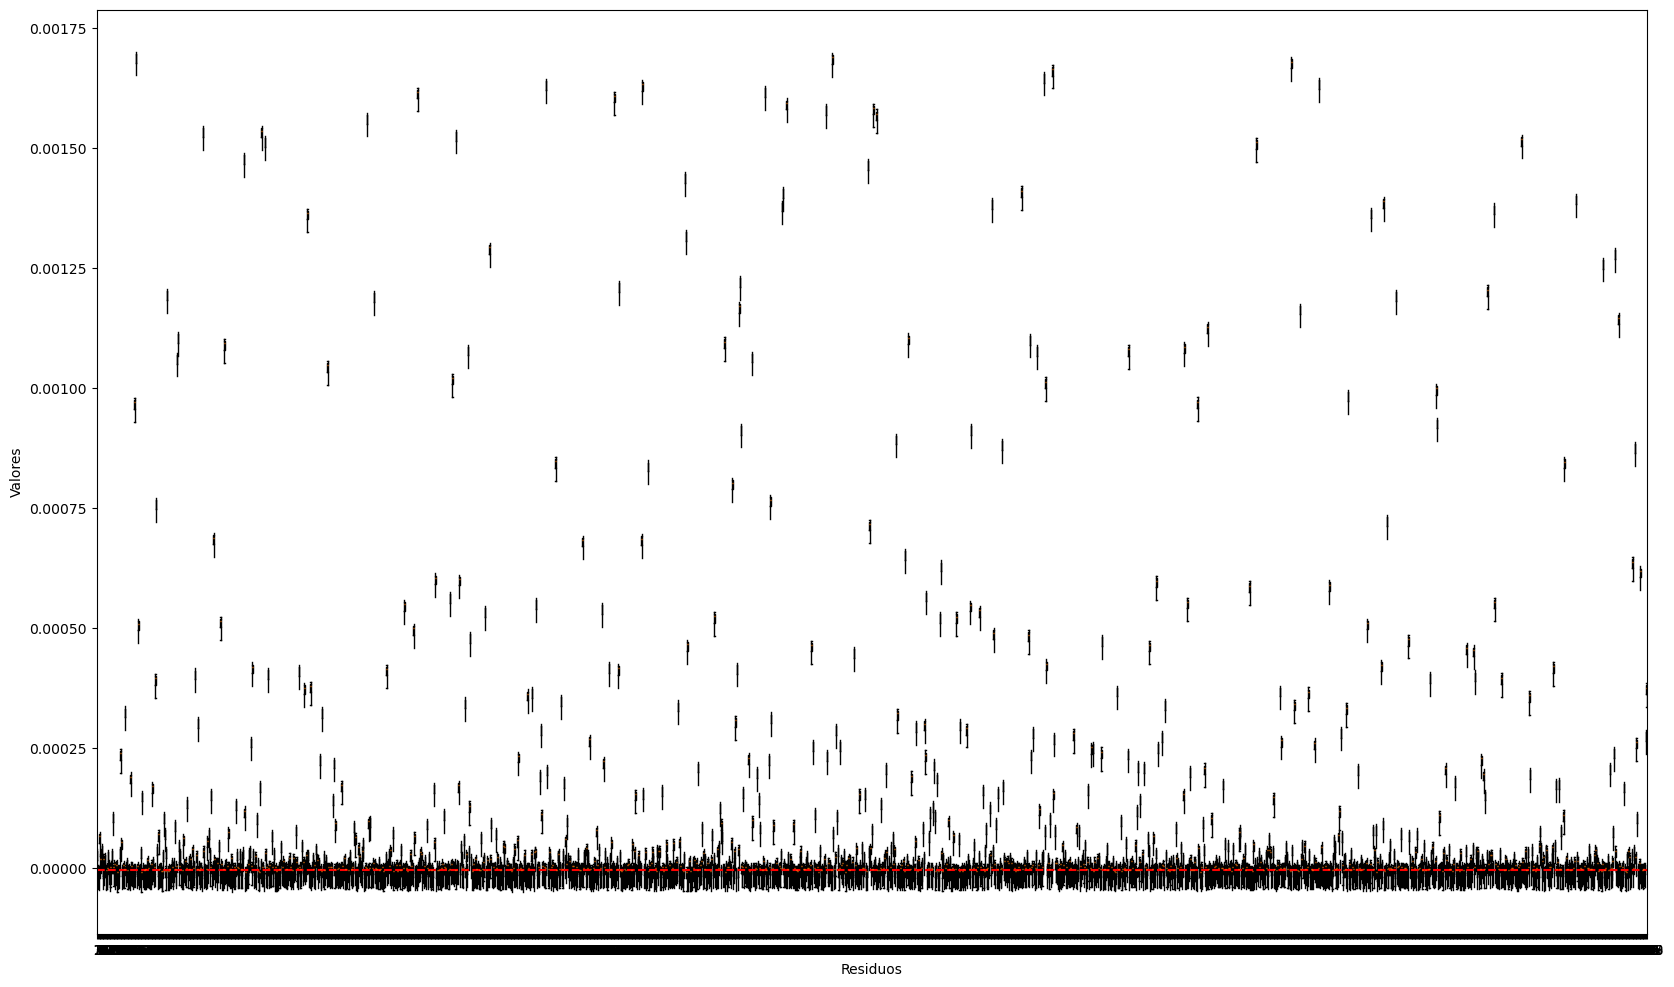

In [150]:
# Calcular caja de los residuos
residuals = y_test - y_pred

# Obtener la caja de residuos
plt.figure(figsize=(20, 12))
plt.boxplot(residuals, showfliers=False)
plt.axhline(residuals.mean(), color="red", linestyle="dashed")
plt.xlabel("Residuos")
plt.ylabel("Valores")
plt.show()

## Ajuste del modelo de bosques aleatorios a datos originales: 
* Se obtiene una metrica de R2 de 0.93 que es la mejor obtenida con valores pequeños de mae y mse
* Este es el modelo mas optimo a implementar

In [152]:
### ajuste del modelo a los datos originales


X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']

y_col = ['lineal_Profit']

X = df[X_cols].values
y = df[y_col].values

# Definir los hiperparámetros que se van a probar
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Crear el objeto de búsqueda de hiperparámetros
clf = GridSearchCV(rf_model, param_grid)

# Ajustar el modelo al conjunto de datos original
clf.fit(X, y)

# Obtener las predicciones para el conjunto de datos original
y_pred = clf.predict(X)

# Imprimir las predicciones
print(y_pred)

# Convertir y_pred a un DataFrame
df_pred = pd.DataFrame(y_pred, columns=['y_pred_2'])

# Concatenar los datos originales con las predicciones
df_with_pred = pd.concat([df, df_pred], axis=1)

print(df_with_pred)

# Obtener el número de filas y_pred
n_filas_y_pred = len(y_pred )
print('numero de filas de y_pred:',n_filas_y_pred)

# Verificar que la columna "y_pred_2" ya no tiene valores faltantes
if df_with_pred["y_pred_2"].isnull().sum() > 0:
    print("La columna y_pred_2 tiene valores nulos")
else:
    print("La columna y_pred_2 no tiene valores nulos")

# Obtener los mejores hiperparámetros
best_params = clf.best_params_

# Obtener el MSE del mejor modelo
best_mse = clf.best_score_

# Imprimir los mejores hiperparámetros y el MSE del mejor modelo

# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento
r2 = r2_score(y, y_pred)
print('r2:',r2)


# Calcular el MAE
mae = mean_absolute_error(y, y_pred)

# Imprimir "Mejores hiperparámetros:", best_params
print("Mejores hiperparámetros:", best_params)

# Imprimir "MSE del mejor modelo:", mse
print("MSE del mejor modelo:", mse)

# Imprimir "MAE del mejor modelo:", mae
print("MAE del mejor modelo:", mae)


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

[0.00168277 0.00129065 0.00169537 ... 0.00170045 0.00169906 0.00167891]
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country   

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

[0.00168277 0.00129065 0.00169537 ... 0.00170045 0.00169906 0.00167905]
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country   

## Se obtiene una buena validación cruzada:

In [153]:

# validacion cruzada

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_cols = ['lineal_Segment_', 'lineal_Category_', 'lineal_Region_', 'lineal_Discount', 'lineal_Sales', 'lineal_Quantity']


y_col = ['lineal_Profit']

X = df[X_cols].values
y = df[y_col].values

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir los parámetros de la validación cruzada
cv = 5
scoring = 'r2'

# Realizar la validación cruzada
scores = cross_val_score(rf_model, X, y, cv=cv, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print('R2 promedio:', np.mean(scores))

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

R2 promedio: 0.7986855354979229


## Ajuste del modelo de bosques aleatorios a datos originales: 
* Se observa una relación lineal entre lineal_profit y y_pred_2
* Los valores de ambas variables son muy cercanos validando asi la correcta predicción 


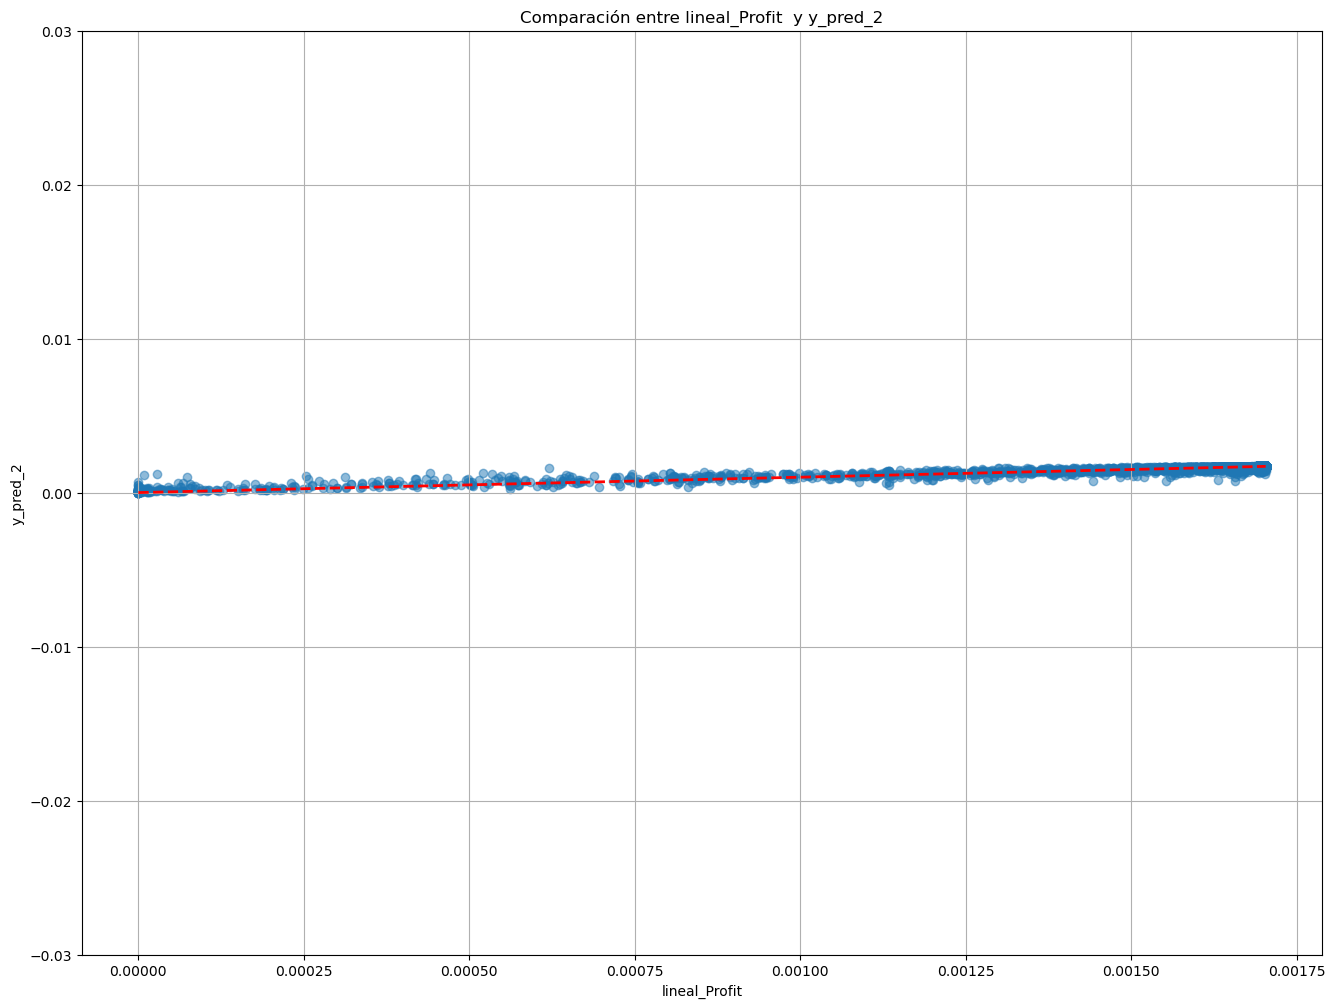

In [154]:
# comparacion de profit vs Y_PRED_2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crear un gráfico de dispersión para visualizar la relación entre y_originales y y_predichos

plt.figure(figsize=(16, 12))
plt.scatter(df_with_pred['lineal_Profit'], df_with_pred['y_pred_2'], alpha=0.5)
plt.xlabel('lineal_Profit')
plt.ylabel('y_pred_2')
plt.ylim(-0.03, 0.03)
plt.title('Comparación entre lineal_Profit  y y_pred_2')
plt.grid(True)

# Agregar una línea de regresión para visualizar la tendencia
plt.plot([df_with_pred['lineal_Profit'].min(), df_with_pred['y_pred_2'].max()], [df_with_pred['lineal_Profit'].min(), df_with_pred['y_pred_2'].max()], linestyle='--', color='red', linewidth=2)

'''
# Mostrar las métricas en el gráfico
plt.text(0.7, 0.1, f'MSE: {mse:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.2, f'MAE: {mae:.2f}', transform=plt.gca().transAxes)
plt.text(0.7, 0.3, f'R^2: {r2:.2f}', transform=plt.gca().transAxes)
'''
# Mostrar el gráfico
plt.show()

## Regla de 3 para convertir y_pred_2 de un valor linealizado a un valor en la escala de los datos originales:

In [155]:
# regla de 3

# Calculamos el valor de d

d = df_with_pred['y_pred_2'] * (df_with_pred['Profit'] / df_with_pred['lineal_Profit'])
stats_p_2 = d.describe()
print(stats_p_2)

# Imprimimos los resultados
#print(d)

count     9.994000e+03
mean     6.136794e+275
std                inf
min     -6.579693e+175
25%       1.725087e+00
50%       8.627380e+00
75%       2.921330e+01
max      6.133112e+279
dtype: float64


C:\Users\Windows\anaconda3\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


## Se crea la columna aprox_2:

In [156]:
# creamos la columna aprox_2 en el dataframe

df_with_pred['aprox_2'] = d

print(df_with_pred)

# variable profit
v_p = df_with_pred['Profit']

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

## Comparacion de la prediccion final:
* aprox_2 surge del modelo de bosques aleatorios con varios hiperparametros
* Se observa una muy buena aproximacion en la prediccion de la variable Profit

In [157]:
# ver solo 2 columnas (Profit y aprox_2)

# Utilizar la función tail() para obtener las últimas 50 filas
ultimas_filas = df_with_pred.tail(60)

# Seleccionar las dos columnas deseadas
columnas_deseadas = ultimas_filas[['Profit', 'aprox_2']]

# Imprimir las últimas 50 filas con las dos columnas seleccionadas
print(columnas_deseadas)

        Profit      aprox_2
9934    2.5146     2.518083
9935    3.6744     3.676386
9936   48.3771    48.333583
9937   -1.7772    -1.779900
9938   19.9155    19.912985
9939    9.9456     9.948030
9940    4.8160     4.527035
9941   87.1962    87.031482
9942   29.9646    25.229349
9943   13.2990    13.288030
9944    0.4074     0.406707
9945    1.0700     1.070007
9946   32.1300    32.037168
9947  539.2464   950.402256
9948  793.7160  7670.268364
9949   15.9543    15.923784
9950   14.7593    14.737598
9951    8.6900     8.688611
9952   20.7240    20.712083
9953    3.1104     3.110317
9954   11.5587    11.552018
9955   10.2588    10.168649
9956   21.7845    21.729978
9957  109.7208   112.439344
9958    2.1900     2.190564
9959    1.8688     1.869519
9960    3.2400     3.234572
9961   23.7742    23.745640
9962  -67.6704   -66.749536
9963    3.6288     3.628264
9964    6.4320     6.428309
9965    2.3406     2.340508
9966   51.5543    51.456689
9967   18.0900    18.005830
9968  331.1910   382

## CONCLUSIONES:

* de acuerdo a la implementación de los modelos para predecir la ganacia (Profit) el de mejor resultado fue el de la implementacion del modelo de bosqueas aleatorios con varios hiperparametros con u resultado de R2 de 0.93 y con valores pequeños de mse y mae

* Con estos resultados se pueden determinar que variables independientes tienen mayor peso para obtener la mejor ganancia
